In [17]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Machine Learning imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline


In [18]:
#dataset from a local file
df = pd.read_csv('/Users/bohlale/Desktop/habits.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nBasic Statistics:")
display(df.describe(include='all'))

Dataset Shape: (1000, 16)

First 5 rows:


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               100

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,1000,1000.0000,1000,1000.00000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000,1000.000000,909,1000,1000.000000,1000,1000.000000
unique,1000,NaN,3,NaN,NaN,NaN,2,NaN,NaN,3,NaN,3,3,NaN,2,NaN
top,S1000,NaN,Female,NaN,NaN,NaN,No,NaN,NaN,Fair,NaN,High School,Good,NaN,No,NaN
freq,1,NaN,481,NaN,NaN,NaN,785,NaN,NaN,437,NaN,392,447,NaN,682,NaN
mean,NaN,20.4980,NaN,3.55010,2.505500,1.819700,NaN,84.131700,6.470100,NaN,3.042000,NaN,NaN,5.438000,NaN,69.601500
std,NaN,2.3081,NaN,1.46889,1.172422,1.075118,NaN,9.399246,1.226377,NaN,2.025423,NaN,NaN,2.847501,NaN,16.888564
min,NaN,17.0000,NaN,0.00000,0.000000,0.000000,NaN,56.000000,3.200000,NaN,0.000000,NaN,NaN,1.000000,NaN,18.400000
25%,NaN,18.7500,NaN,2.60000,1.700000,1.000000,NaN,78.000000,5.600000,NaN,1.000000,NaN,NaN,3.000000,NaN,58.475000
50%,NaN,20.0000,NaN,3.50000,2.500000,1.800000,NaN,84.400000,6.500000,NaN,3.000000,NaN,NaN,5.000000,NaN,70.500000
75%,NaN,23.0000,NaN,4.50000,3.300000,2.525000,NaN,91.025000,7.300000,NaN,5.000000,NaN,NaN,8.000000,NaN,81.325000


In [19]:
# Check for missing values
print("Missing Values:")
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
display(missing_info[missing_info['Missing Count'] > 0])


# Check data types
print("\nData Types:")
print(df.dtypes)

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nCategorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

Missing Values:


,Missing Count,Missing Percentage
parental_education_level,91,9.1



Data Types:
student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object

Categorical columns: ['student_id', 'gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']
Numerical columns: ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'ment

In [20]:
# Create a copy of the original dataframe
df_clean = df.copy()


# Handle numerical missing values
numerical_missing = [col for col in numerical_cols if df_clean[col].isnull().sum() > 0]

if numerical_missing:
    print(f"Numerical columns with missing values: {numerical_missing}")
    
   
    for col in numerical_missing:
        if df_clean[col].skew() < 2: 
            df_clean[col].fillna(df_clean[col].mean(), inplace=True)
            print(f"Filled {col} with mean: {df_clean[col].mean():.2f}")
        else: 
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
            print(f"Filled {col} with median: {df_clean[col].median():.2f}")

# Handle categorical missing values
categorical_missing = [col for col in categorical_cols if df_clean[col].isnull().sum() > 0]

if categorical_missing:
    print(f"\nCategorical columns with missing values: {categorical_missing}")
    
    for col in categorical_missing:
        # Fill with mode (most frequent value)
        mode_value = df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'Unknown'
        df_clean[col].fillna(mode_value, inplace=True)
        print(f"Filled {col} with mode: {mode_value}")

# Verify no missing values remain
print(f"\nRemaining missing values: {df_clean.isnull().sum().sum()}")


Categorical columns with missing values: ['parental_education_level']
Filled parental_education_level with mode: High School

Remaining missing values: 0


In [21]:
# Create a copy before encoding for reference
df_encoded = df_clean.copy()

# Identify categorical columns again (in case some were created during cleaning)
categorical_cols = df_encoded.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Categorical columns to encode: {categorical_cols}")

# Dictionary to store encoders for potential inverse transformation
encoders = {}

for col in categorical_cols:
    print(f"\nProcessing: {col}")
    print(f"Unique values: {df_encoded[col].nunique()}")
    print(f"Value counts:\n{df_encoded[col].value_counts()}")
    
    # Choose encoding strategy based on cardinality
    if df_encoded[col].nunique() <= 10:  # Low cardinality -> One-Hot Encoding
        # One-Hot Encoding
        dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        df_encoded.drop(col, axis=1, inplace=True)
        print(f"Applied One-Hot Encoding to {col}")
        
    else:  # High cardinality -> Label Encoding
        # Label Encoding
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        encoders[col] = le
        print(f"Applied Label Encoding to {col}")

print(f"\nShape after encoding: {df_encoded.shape}")
print("\nFirst 5 rows after encoding:")
display(df_encoded.head())

Categorical columns to encode: ['student_id', 'gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']

Processing: student_id
Unique values: 1000
Value counts:
student_id
S1000    1
S1671    1
S1658    1
S1659    1
S1660    1
        ..
S1338    1
S1339    1
S1340    1
S1341    1
S1999    1
Name: count, Length: 1000, dtype: int64
Applied Label Encoding to student_id

Processing: gender
Unique values: 3
Value counts:
gender
Female    481
Male      477
Other      42
Name: count, dtype: int64
Applied One-Hot Encoding to gender

Processing: part_time_job
Unique values: 2
Value counts:
part_time_job
No     785
Yes    215
Name: count, dtype: int64
Applied One-Hot Encoding to part_time_job

Processing: diet_quality
Unique values: 3
Value counts:
diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64
Applied One-Hot Encoding to diet_quality

Processing: parental_education_level
Unique values: 3
Value counts

,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Male,gender_Other,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes
0,0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,False,False,False,False,False,False,True,False,False,True
1,1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,False,False,False,True,False,True,False,False,False,False
2,2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,True,False,False,False,True,True,False,False,True,False
3,3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,False,False,False,False,True,False,True,True,False,True
4,4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,False,False,False,False,False,False,True,True,False,False


Numerical columns to standardize: ['student_id', 'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']


,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.00000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,0.00000,-4.991563e-16,-3.304024e-16,-4.973799e-17,-9.947598e-17,5.293543e-16,-3.446132e-16,4.796163e-17,1.030287e-16,-7.638334e-17
std,1.00050,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.73032,-1.516291e+00,-2.418068e+00,-2.138098e+00,-1.693406e+00,-2.994472e+00,-2.667807e+00,-1.502660e+00,-1.559339e+00,-3.033243e+00
25%,-0.86516,-7.577120e-01,-6.471386e-01,-6.873828e-01,-7.628097e-01,-6.526872e-01,-7.098433e-01,-1.008689e+00,-8.566176e-01,-6.591483e-01
50%,0.00000,-2.158699e-01,-3.412446e-02,-4.693489e-03,-1.833275e-02,2.855913e-02,2.439296e-02,-2.074679e-02,-1.538960e-01,5.322830e-02
75%,0.86516,1.084551e+00,6.470024e-01,6.779959e-01,6.563495e-01,7.337556e-01,6.770474e-01,9.671954e-01,9.001864e-01,6.945153e-01
max,1.73032,1.518025e+00,3.235284e+00,4.006106e+00,3.331814e+00,1.689097e+00,2.879756e+00,1.461166e+00,1.602908e+00,1.800846e+00


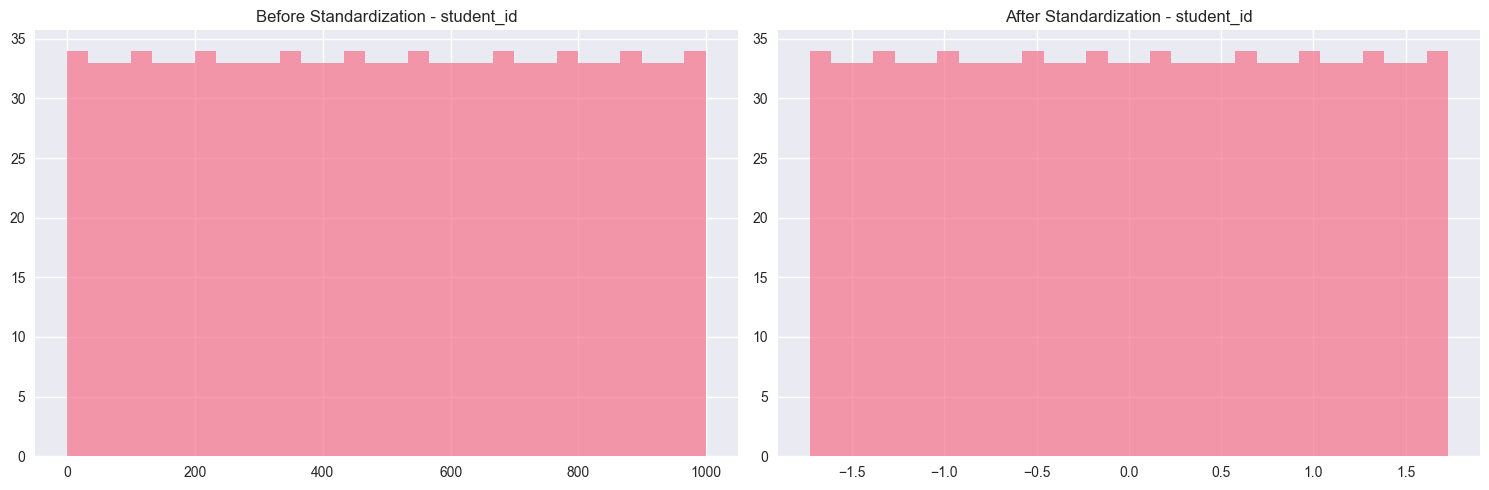

In [22]:

# Identify numerical columns after encoding
numerical_cols_encoded = df_encoded.select_dtypes(include=[np.number]).columns.tolist()

print(f"Numerical columns to standardize: {numerical_cols_encoded}")

# Initialize scaler
scaler = StandardScaler()

# Create a copy for standardization
df_scaled = df_encoded.copy()

# Standardize numerical columns
df_scaled[numerical_cols_encoded] = scaler.fit_transform(df_scaled[numerical_cols_encoded])

display(df_scaled[numerical_cols_encoded].describe())

# Visualize distribution before and after scaling
if numerical_cols_encoded:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Before standardization
    df_encoded[numerical_cols_encoded[0]].hist(ax=axes[0], bins=30, alpha=0.7)
    axes[0].set_title(f'Before Standardization - {numerical_cols_encoded[0]}')
    
    # After standardization
    df_scaled[numerical_cols_encoded[0]].hist(ax=axes[1], bins=30, alpha=0.7)
    axes[1].set_title(f'After Standardization - {numerical_cols_encoded[0]}')
    
    plt.tight_layout()
    plt.show()

In [23]:
# Final cleaned dataset
students_clean = df_scaled.copy()

print("Final Dataset Information:")
print(f"Shape: {students_clean.shape}")
print(f"Columns: {list(students_clean.columns)}")
print(f"Data types:\n{students_clean.dtypes}")

# Save to CSV
students_clean.to_csv('/Users/bohlale/Desktop/students_clean.csv', index=False)

# Compare original vs cleaned dataset
print('comparing original data with clean data')
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {students_clean.shape}")
print(f"Missing values in original: {df.isnull().sum().sum()}")
print(f"Missing values in cleaned: {students_clean.isnull().sum().sum()}")
print(f"Original columns: {len(df.columns)}")
print(f"Cleaned columns: {len(students_clean.columns)}")

Final Dataset Information:
Shape: (1000, 20)
Columns: ['student_id', 'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score', 'gender_Male', 'gender_Other', 'part_time_job_Yes', 'diet_quality_Good', 'diet_quality_Poor', 'parental_education_level_High School', 'parental_education_level_Master', 'internet_quality_Good', 'internet_quality_Poor', 'extracurricular_participation_Yes']
Data types:
student_id                              float64
age                                     float64
study_hours_per_day                     float64
social_media_hours                      float64
netflix_hours                           float64
attendance_percentage                   float64
sleep_hours                             float64
exercise_frequency                      float64
mental_health_rating                    float64
exam_score                              float64
gender_Male   

In [24]:
# Load the cleaned dataset
try:
    df = pd.read_csv('/Users/bohlale/Desktop/students_clean.csv')
except:
    # If cleaned dataset doesn't exist, create sample data
    print("Creating sample dataset for demonstration...")
    np.random.seed(42)
    n_samples = 500
    
    data = {
        'age': np.random.randint(18, 25, n_samples),
        'gpa': np.random.normal(3.0, 0.5, n_samples),
        'study_hours': np.random.randint(5, 40, n_samples),
        'attendance': np.random.randint(60, 100, n_samples),
        'extracurricular': np.random.randint(0, 5, n_samples),
        'parent_education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], n_samples),
        'internet_access': np.random.choice(['Yes', 'No'], n_samples),
        'gender': np.random.choice(['Male', 'Female'], n_samples),
        'target': np.random.choice([0, 1], n_samples, p=[0.4, 0.6])  # 1 = Pass, 0 = Fail
    }
    
    df = pd.DataFrame(data)
    df.to_csv('students_clean.csv', index=False)
    print("✅ Sample dataset created and saved!")

print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset info:")
print(df.info())

Dataset shape: (1000, 20)

First 5 rows:


,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Male,gender_Other,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes
0,-1.730320,1.084551,-2.418068,-1.114064,-0.669750,0.092426,1.248120,1.461166,0.900186,-0.793922,False,False,False,False,False,False,True,False,False,True
1,-1.726856,-0.215870,2.281707,0.251315,0.446965,1.401696,-1.525661,1.461166,0.900186,1.800846,False,False,False,True,False,True,False,False,False,False
2,-1.723391,0.217604,-1.464491,0.507324,-0.483631,1.135584,1.248120,-1.008689,-1.559339,-2.091307,True,False,False,False,True,True,False,False,True,False
3,-1.719927,1.084551,-1.736942,1.190013,-0.762810,-1.397800,2.227102,0.473224,-1.559339,-2.535616,False,False,False,False,True,False,True,True,False,True
4,-1.716463,-0.649344,0.987566,1.616694,-1.228108,0.720450,-1.280916,-0.020747,-1.559339,-0.189661,False,False,False,False,False,False,True,True,False,False



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   student_id                            1000 non-null   float64
 1   age                                   1000 non-null   float64
 2   study_hours_per_day                   1000 non-null   float64
 3   social_media_hours                    1000 non-null   float64
 4   netflix_hours                         1000 non-null   float64
 5   attendance_percentage                 1000 non-null   float64
 6   sleep_hours                           1000 non-null   float64
 7   exercise_frequency                    1000 non-null   float64
 8   mental_health_rating                  1000 non-null   float64
 9   exam_score                            1000 non-null   float64
 10  gender_Male                           1000 non-null   bool   
 11  gen

FIXED SCATTER PLOTS
Using 'age' as target variable


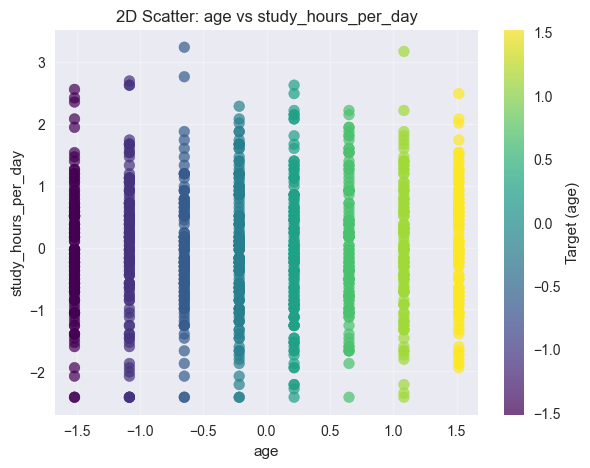

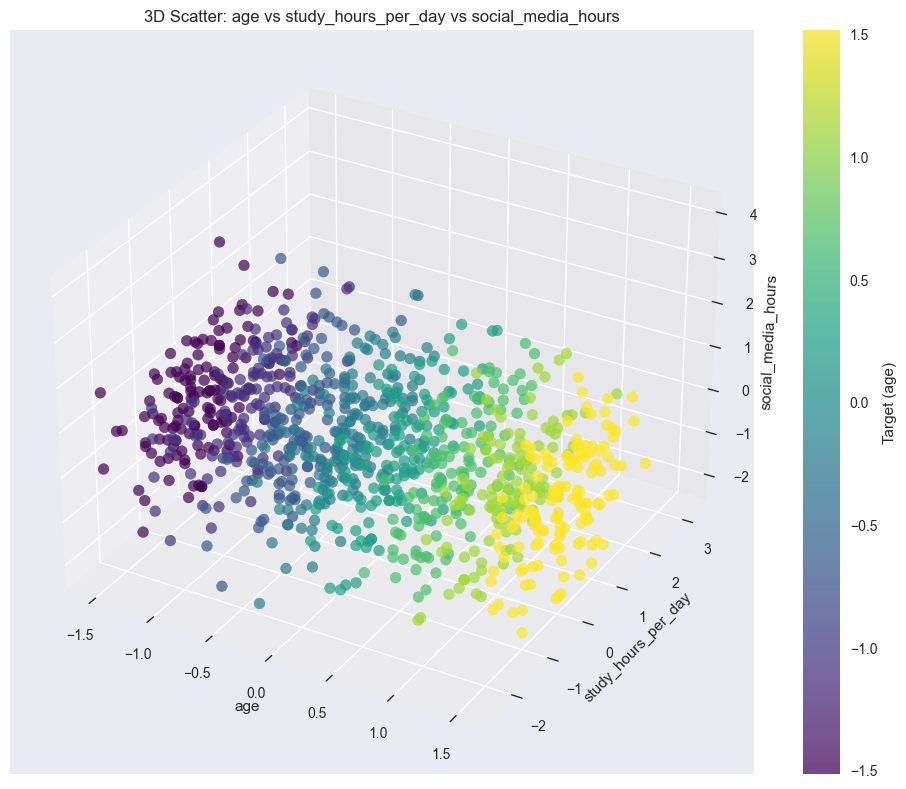

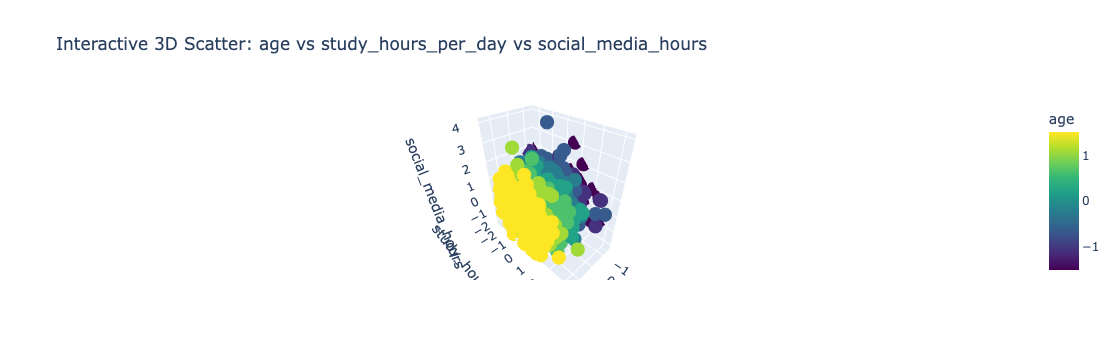

In [25]:
print("FIXED SCATTER PLOTS")
print("===============================================================================")

# Use actual columns from your dataset
if len(numerical_cols) >= 3:
    # Use first 3 numerical columns for scatter plots
    col1, col2, col3 = numerical_cols[:3]
    
    # Check if we have a target column
    if 'target' in df.columns:
        target_col = 'target'
    elif len([col for col in df.columns if df[col].nunique() <= 10]) > 0:
        target_col = [col for col in df.columns if df[col].nunique() <= 10][0]
        print(f"Using '{target_col}' as target variable")
    else:
        target_col = None
    
    # 2D Scatter Plot
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    if target_col:
        scatter = plt.scatter(df[col1], df[col2], c=df[target_col], 
                             cmap='viridis', alpha=0.7, s=60)
        plt.colorbar(scatter, label=f'Target ({target_col})')
    else:
        scatter = plt.scatter(df[col1], df[col2], alpha=0.7, s=60, color='blue')
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'2D Scatter: {col1} vs {col2}')
    plt.grid(True, alpha=0.3)
    
    # 3D Scatter Plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    if target_col:
        scatter = ax.scatter(df[col1], df[col2], df[col3], 
                            c=df[target_col], cmap='viridis', s=60, alpha=0.7)
        plt.colorbar(scatter, label=f'Target ({target_col})')
    else:
        scatter = ax.scatter(df[col1], df[col2], df[col3], 
                            s=60, alpha=0.7, color='blue')
    
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_zlabel(col3)
    ax.set_title(f'3D Scatter: {col1} vs {col2} vs {col3}')
    plt.tight_layout()
    plt.show()
    
    # Interactive 3D scatter plot with plotly
    if target_col:
        fig = px.scatter_3d(df, x=col1, y=col2, z=col3,
                           color=target_col, 
                           title=f'Interactive 3D Scatter: {col1} vs {col2} vs {col3}',
                           color_continuous_scale='viridis')
    else:
        fig = px.scatter_3d(df, x=col1, y=col2, z=col3,
                           title=f'Interactive 3D Scatter: {col1} vs {col2} vs {col3}')
    fig.show()
    
else:

    if len(numerical_cols) >= 2:
        # 2D only
        col1, col2 = numerical_cols[:2]
        plt.figure(figsize=(8, 6))
        
        if 'target' in df.columns:
            scatter = plt.scatter(df[col1], df[col2], c=df['target'], 
                                 cmap='viridis', alpha=0.7, s=60)
            plt.colorbar(scatter, label='Target')
        else:
            scatter = plt.scatter(df[col1], df[col2], alpha=0.7, s=60, color='blue')
        
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.title(f'2D Scatter: {col1} vs {col2}')
        plt.grid(True, alpha=0.3)
        plt.show()

In [26]:
print('skip')

skip


BOX AND VIOLIN PLOTS


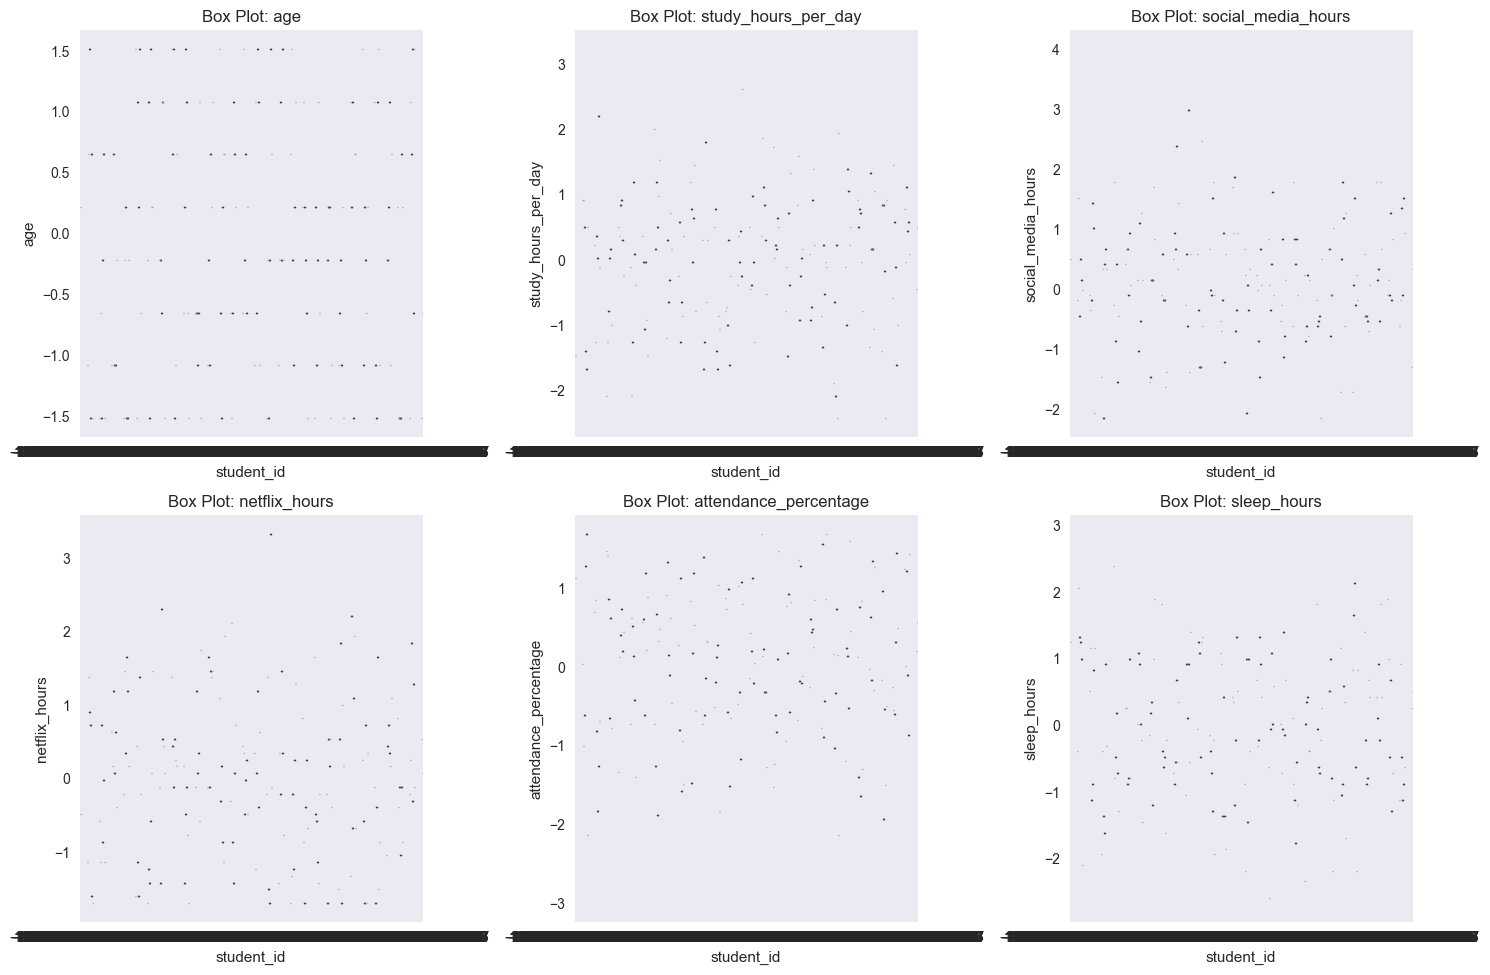

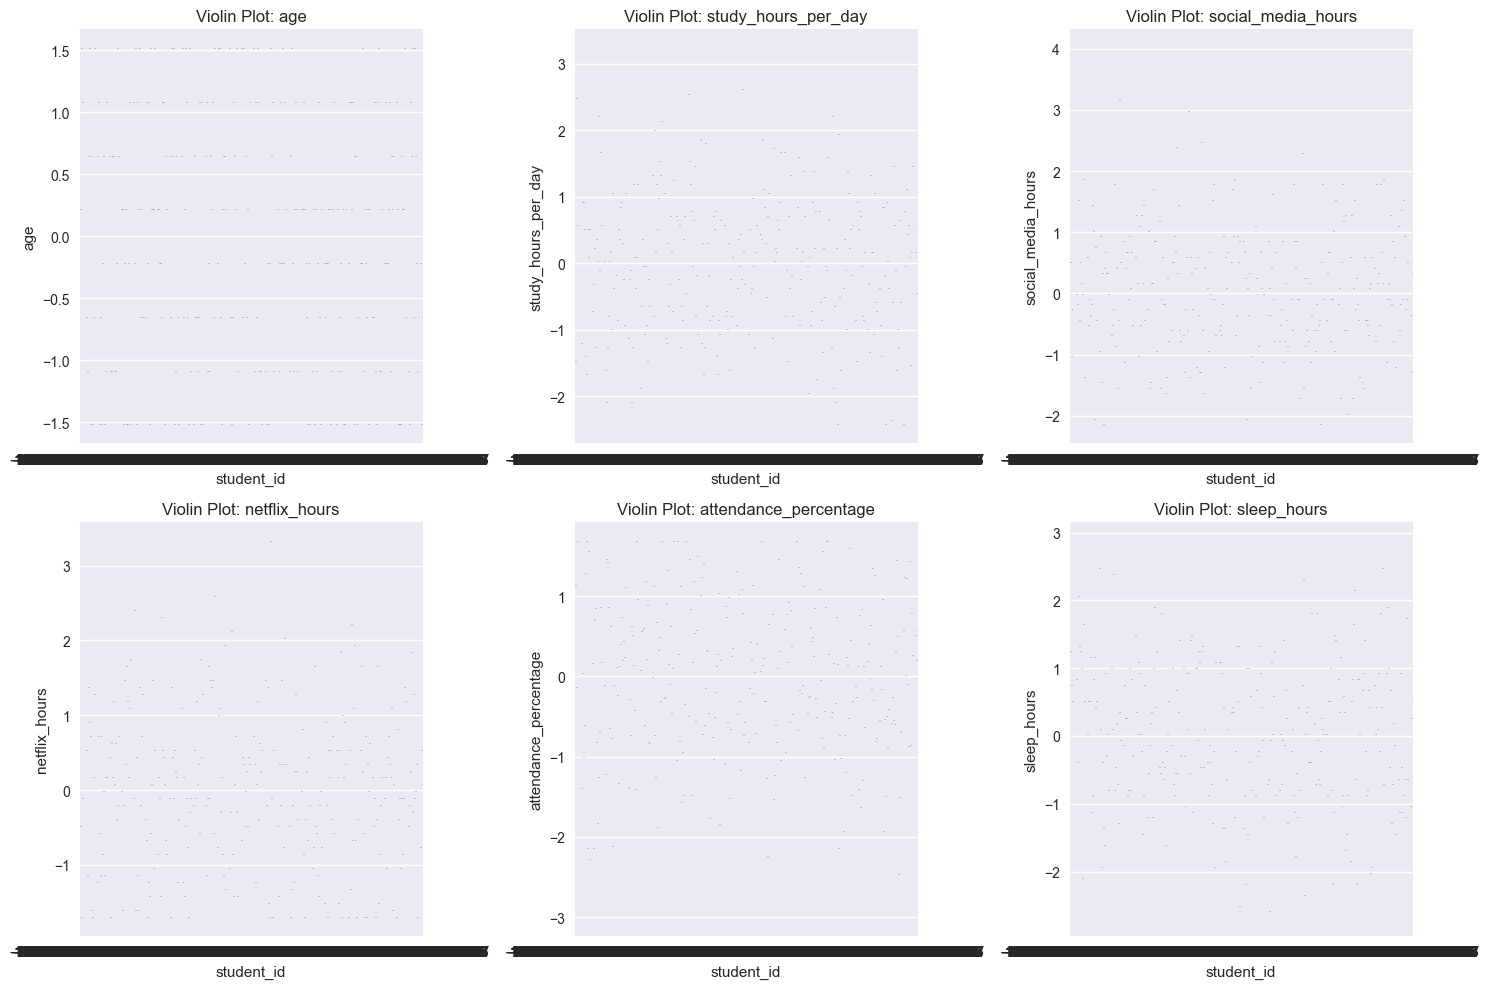

In [27]:
print("BOX AND VIOLIN PLOTS")
print("==========================================================================================")

if numerical_cols:
    # Determine target column
    if 'target' in df.columns:
        target_col = 'target'
    else:
      
        target_col = categorical_cols[0] if categorical_cols else None
    
    if target_col:
        # Create subplots
        n_plots = min(6, len(numerical_cols))
        n_rows = 2 if n_plots > 3 else 1
        n_cols = min(3, n_plots)
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
        if n_plots > 1:
            axes = axes.ravel()
        else:
            axes = [axes]
        
        for i, col in enumerate(numerical_cols[:n_plots]):
            # Box plot
            df.boxplot(column=col, by=target_col, ax=axes[i], grid=False)
            axes[i].set_title(f'Box Plot: {col}')
            axes[i].set_ylabel(col)
        
        plt.suptitle('')
        plt.tight_layout()
        plt.show()
        
        # Violin plots
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
        if n_plots > 1:
            axes = axes.ravel()
        else:
            axes = [axes]
        
        for i, col in enumerate(numerical_cols[:n_plots]):
            sns.violinplot(x=target_col, y=col, data=df, ax=axes[i])
            axes[i].set_title(f'Violin Plot: {col}')
            axes[i].set_xlabel(target_col)
        
        plt.tight_layout()
        plt.show()

In [28]:

# Display dataset information
print("Dataset columns:")
print(df.columns.tolist())
print(f"\nDataset shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nFirst 5 rows:")
display(df.head())

print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col} (dtype: {df[col].dtype})")

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

# Check if target column exists
if 'target' in df.columns:
    print(f"\nTarget variable distribution:")
    print(df['target'].value_counts())
else:

    # Let's check for any potential target columns
    potential_targets = [col for col in df.columns if df[col].nunique() <= 10 and df[col].nunique() >= 2]
    print(f"Potential target columns: {potential_targets}")

Dataset columns:
['student_id', 'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score', 'gender_Male', 'gender_Other', 'part_time_job_Yes', 'diet_quality_Good', 'diet_quality_Poor', 'parental_education_level_High School', 'parental_education_level_Master', 'internet_quality_Good', 'internet_quality_Poor', 'extracurricular_participation_Yes']

Dataset shape: (1000, 20)

Data types:
student_id                              float64
age                                     float64
study_hours_per_day                     float64
social_media_hours                      float64
netflix_hours                           float64
attendance_percentage                   float64
sleep_hours                             float64
exercise_frequency                      float64
mental_health_rating                    float64
exam_score                              float64
gender_Male            

,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Male,gender_Other,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes
0,-1.730320,1.084551,-2.418068,-1.114064,-0.669750,0.092426,1.248120,1.461166,0.900186,-0.793922,False,False,False,False,False,False,True,False,False,True
1,-1.726856,-0.215870,2.281707,0.251315,0.446965,1.401696,-1.525661,1.461166,0.900186,1.800846,False,False,False,True,False,True,False,False,False,False
2,-1.723391,0.217604,-1.464491,0.507324,-0.483631,1.135584,1.248120,-1.008689,-1.559339,-2.091307,True,False,False,False,True,True,False,False,True,False
3,-1.719927,1.084551,-1.736942,1.190013,-0.762810,-1.397800,2.227102,0.473224,-1.559339,-2.535616,False,False,False,False,True,False,True,True,False,True
4,-1.716463,-0.649344,0.987566,1.616694,-1.228108,0.720450,-1.280916,-0.020747,-1.559339,-0.189661,False,False,False,False,False,False,True,True,False,False



Column names:
1. student_id (dtype: float64)
2. age (dtype: float64)
3. study_hours_per_day (dtype: float64)
4. social_media_hours (dtype: float64)
5. netflix_hours (dtype: float64)
6. attendance_percentage (dtype: float64)
7. sleep_hours (dtype: float64)
8. exercise_frequency (dtype: float64)
9. mental_health_rating (dtype: float64)
10. exam_score (dtype: float64)
11. gender_Male (dtype: bool)
12. gender_Other (dtype: bool)
13. part_time_job_Yes (dtype: bool)
14. diet_quality_Good (dtype: bool)
15. diet_quality_Poor (dtype: bool)
16. parental_education_level_High School (dtype: bool)
17. parental_education_level_Master (dtype: bool)
18. internet_quality_Good (dtype: bool)
19. internet_quality_Poor (dtype: bool)
20. extracurricular_participation_Yes (dtype: bool)

Numerical columns: ['student_id', 'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']
Categorical columns: 

In [29]:

# Create a binary target variable based on exam_score (pass/fail)
threshold = df['exam_score'].median()
df['target'] = (df['exam_score'] > threshold).astype(int)

print(f"Target variable created! Threshold: {threshold:.2f}")
print(f"Target distribution:")
print(df['target'].value_counts())
print(f"Pass rate: {df['target'].mean():.2%}")

# Remove temporary column if it exists
if 'temp_target' in df.columns:
    df.drop('temp_target', axis=1, inplace=True)

# Define feature columns
numerical_features = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 
                     'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating']

boolean_features = ['gender_Male', 'gender_Other', 'part_time_job_Yes', 'diet_quality_Good', 
                   'diet_quality_Poor', 'parental_education_level_High School', 
                   'parental_education_level_Master', 'internet_quality_Good', 
                   'internet_quality_Poor', 'extracurricular_participation_Yes']

# Remove student_id as it's just an identifier
features = numerical_features + boolean_features
target = 'target'

print(f"\nFeatures: {len(features)}")
print(f"Numerical features: {len(numerical_features)}")
print(f"Boolean features: {len(boolean_features)}")
print(f"Target: {target}")

# Display correlation with target
correlation_with_target = df[numerical_features + ['target']].corr()['target'].sort_values(ascending=False)
print(f"\nCorrelation with target:")
print(correlation_with_target)

Target variable created! Threshold: 0.05
Target distribution:
target
0    502
1    498
Name: count, dtype: int64
Pass rate: 49.80%

Features: 18
Numerical features: 8
Boolean features: 10
Target: target

Correlation with target:
target                   1.000000
study_hours_per_day      0.639515
mental_health_rating     0.297869
sleep_hours              0.115342
exercise_frequency       0.107770
attendance_percentage    0.088800
age                     -0.010407
social_media_hours      -0.134045
netflix_hours           -0.148544
Name: target, dtype: float64


SCATTER PLOTS WITH YOUR DATASET


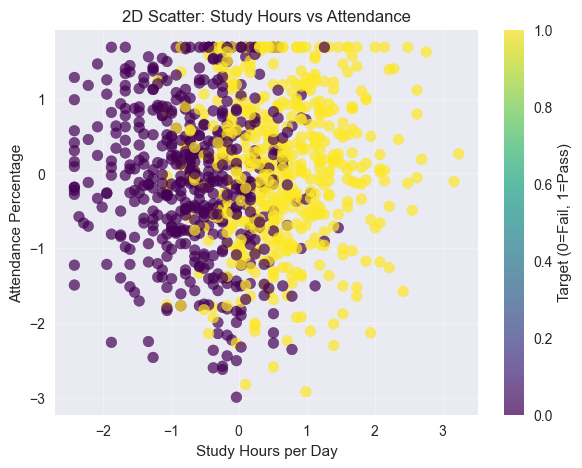

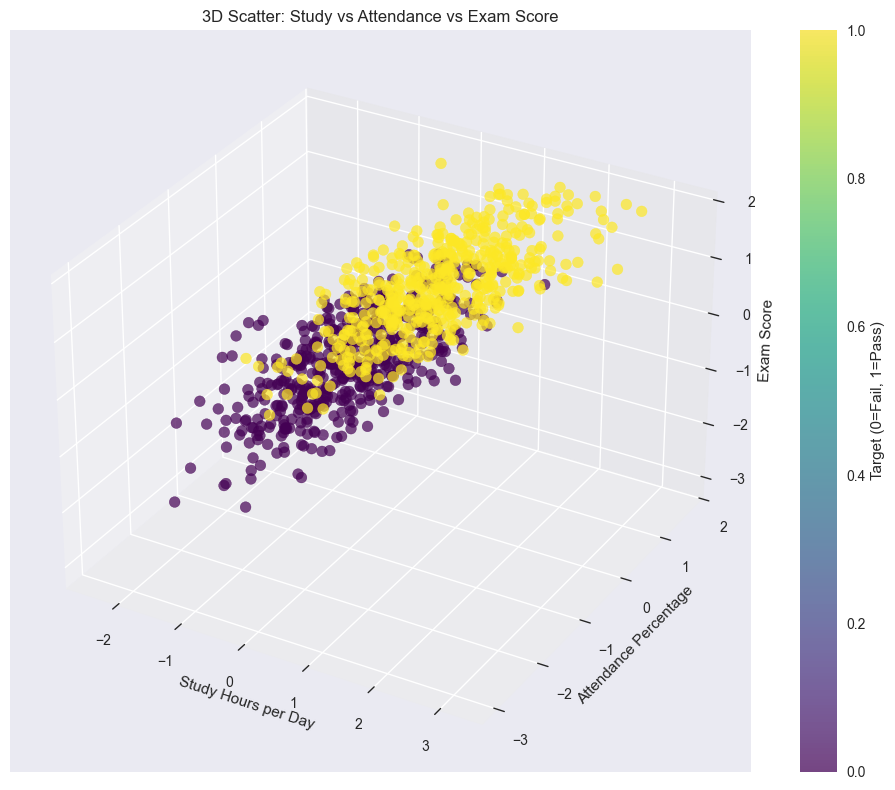

In [30]:
print("SCATTER PLOTS WITH YOUR DATASET")
print("="*50)

# Use your actual columns
col1, col2, col3 = 'study_hours_per_day', 'attendance_percentage', 'exam_score'

# 2D Scatter Plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(df[col1], df[col2], c=df['target'], 
                     cmap='viridis', alpha=0.7, s=60)
plt.colorbar(scatter, label='Target (0=Fail, 1=Pass)')
plt.xlabel('Study Hours per Day')
plt.ylabel('Attendance Percentage')
plt.title('2D Scatter: Study Hours vs Attendance')
plt.grid(True, alpha=0.3)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df[col1], df[col2], df[col3], 
                    c=df['target'], cmap='viridis', s=60, alpha=0.7)
ax.set_xlabel('Study Hours per Day')
ax.set_ylabel('Attendance Percentage')
ax.set_zlabel('Exam Score')
ax.set_title('3D Scatter: Study vs Attendance vs Exam Score')
plt.colorbar(scatter, label='Target (0=Fail, 1=Pass)')
plt.tight_layout()
plt.show()

# Interactive 3D scatter plot with plotly
fig = px.scatter_3d(df, x=col1, y=col2, z=col3,
                    color='target', title='Interactive 3D: Study vs Attendance vs Exam Score',
                    labels={'target': 'Pass/Fail'},
                    color_continuous_scale='viridis')
fig.show()

STACKED BAR CHARTS


<Figure size 1000x600 with 0 Axes>

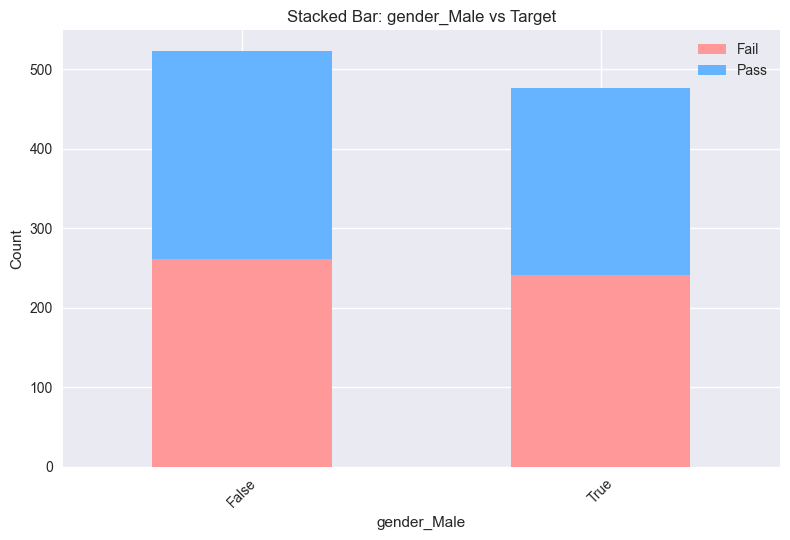

Cross-tabulation for gender_Male:


target,0,1
gender_Male,,
False,261,262
True,241,236


Pass rates:
gender_Male
False    0.500956
True     0.494759
dtype: float64
----------------------------------------


<Figure size 1000x600 with 0 Axes>

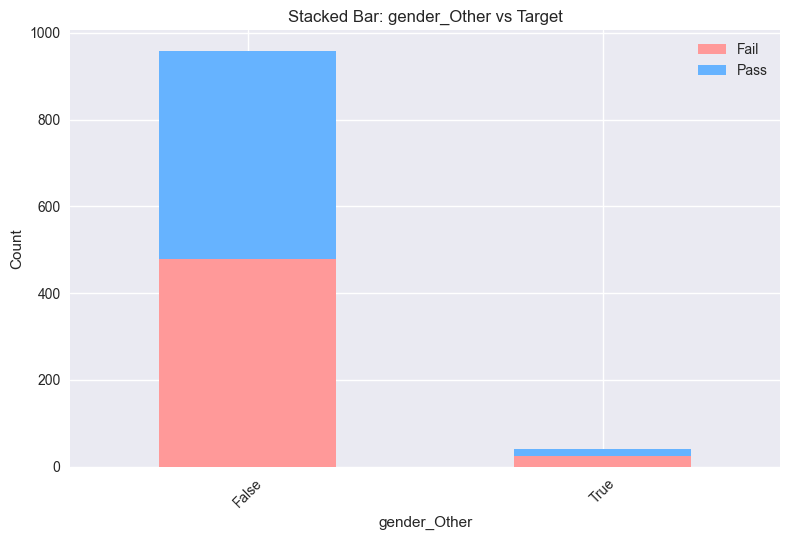

Cross-tabulation for gender_Other:


target,0,1
gender_Other,,
False,478,480
True,24,18


Pass rates:
gender_Other
False    0.501044
True     0.428571
dtype: float64
----------------------------------------


<Figure size 1000x600 with 0 Axes>

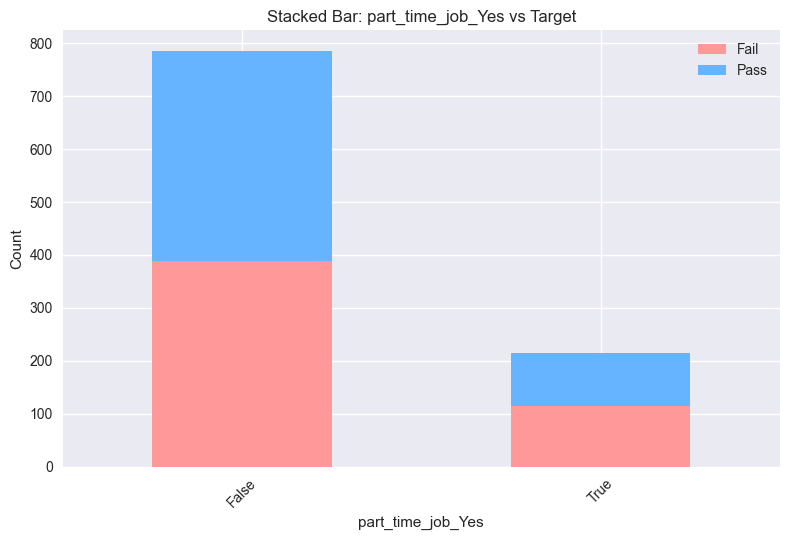

Cross-tabulation for part_time_job_Yes:


target,0,1
part_time_job_Yes,,
False,388,397
True,114,101


Pass rates:
part_time_job_Yes
False    0.505732
True     0.469767
dtype: float64
----------------------------------------


<Figure size 1000x600 with 0 Axes>

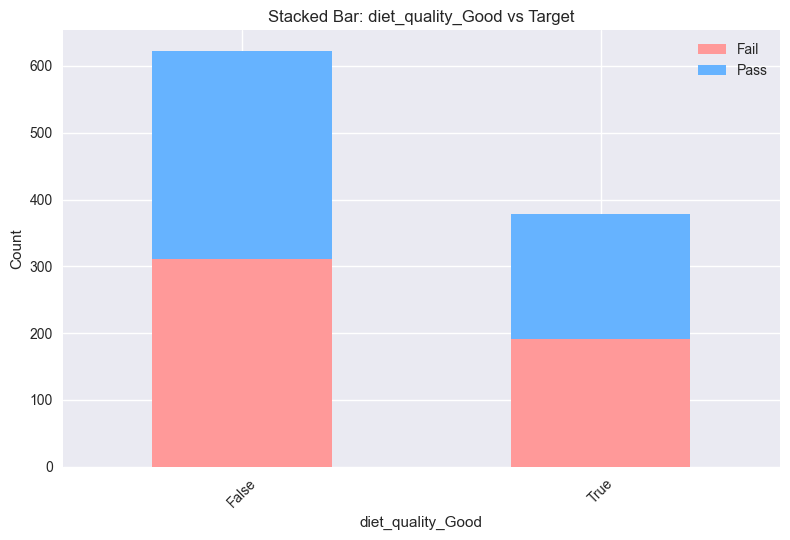

Cross-tabulation for diet_quality_Good:


target,0,1
diet_quality_Good,,
False,311,311
True,191,187


Pass rates:
diet_quality_Good
False    0.500000
True     0.494709
dtype: float64
----------------------------------------


In [31]:
print("STACKED BAR CHARTS")


# Use boolean features for stacked bars
for feature in boolean_features[:4]:  # Show first 4 boolean features
    plt.figure(figsize=(10, 6))
    
    # Create cross-tabulation
    cross_tab = pd.crosstab(df[feature], df['target'])
    
    # Plot stacked bar
    cross_tab.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'])
    plt.title(f'Stacked Bar: {feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(['Fail', 'Pass'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print(f"Cross-tabulation for {feature}:")
    display(cross_tab)
    
    # Calculate pass rates
    pass_rate = cross_tab[1] / (cross_tab[0] + cross_tab[1])
    print(f"Pass rates:\n{pass_rate}")
    print("-" * 40)

BOX AND VIOLIN PLOTS


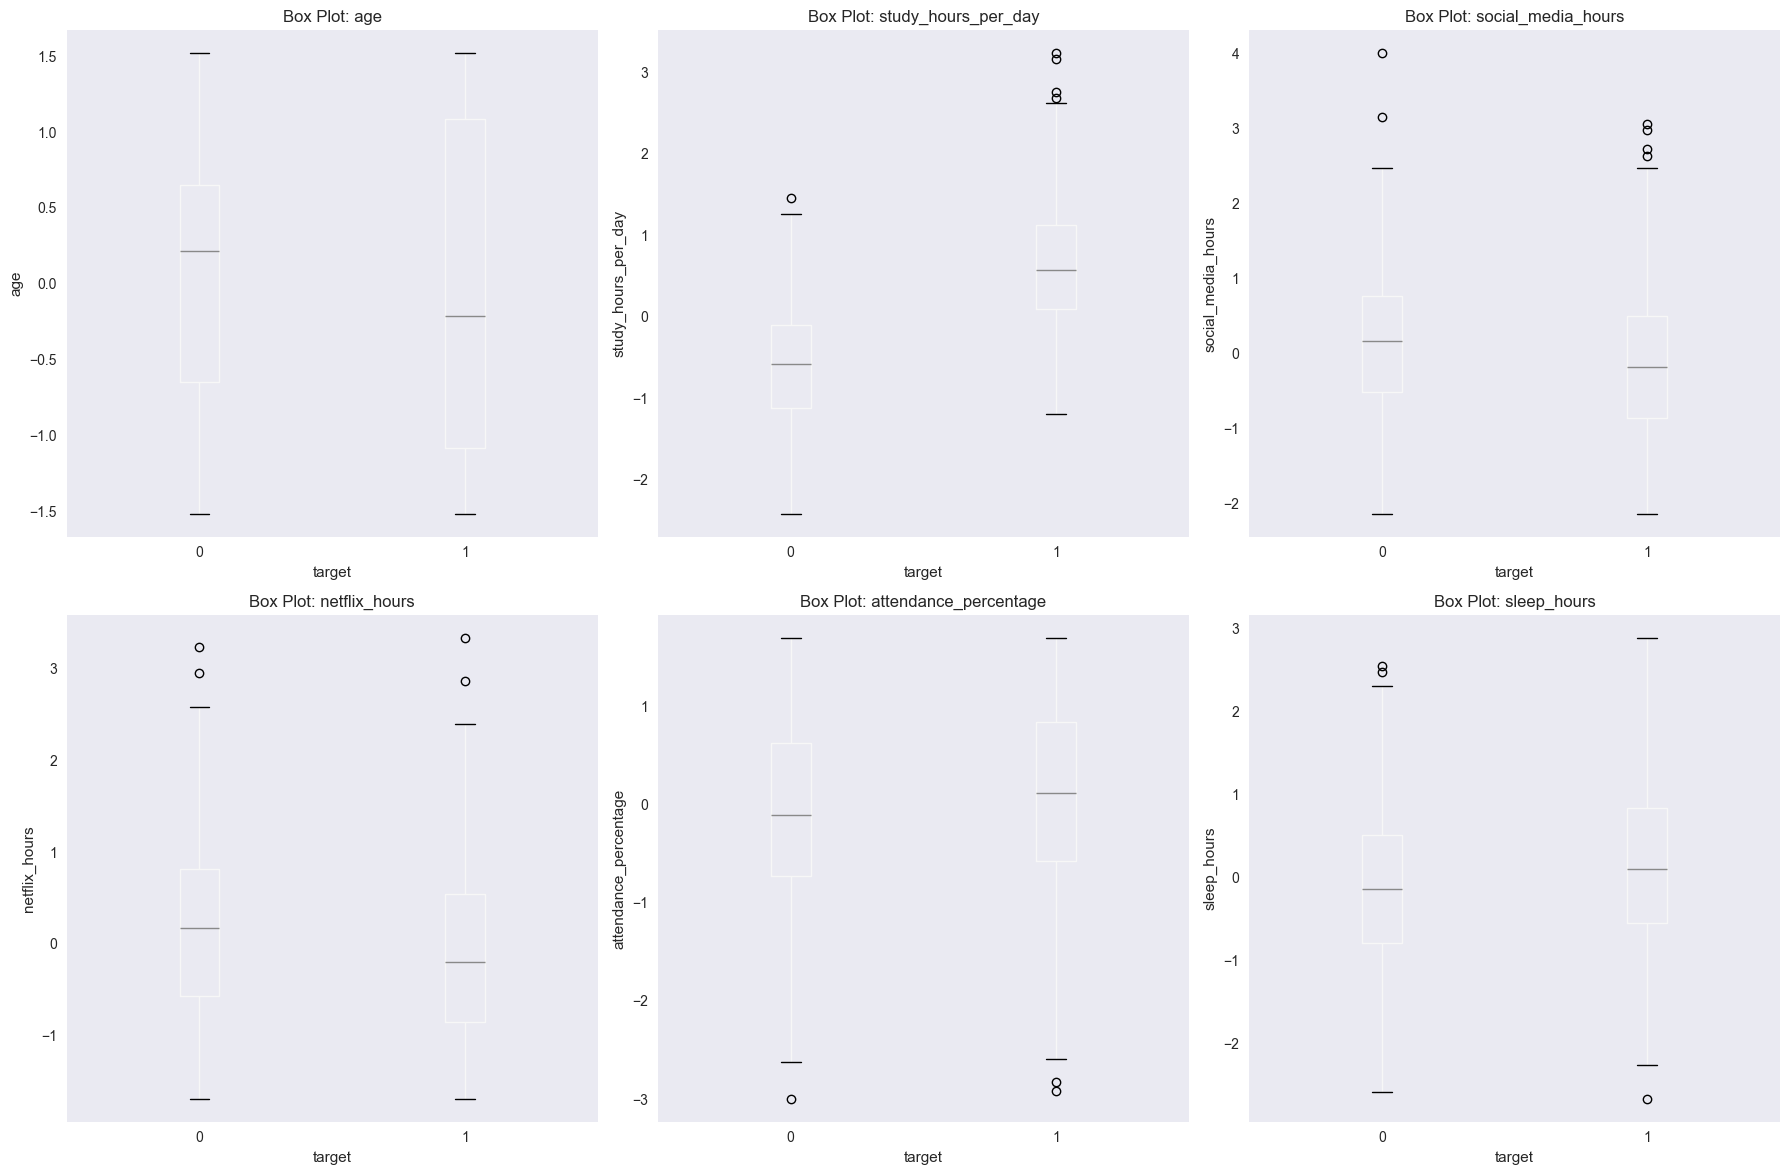

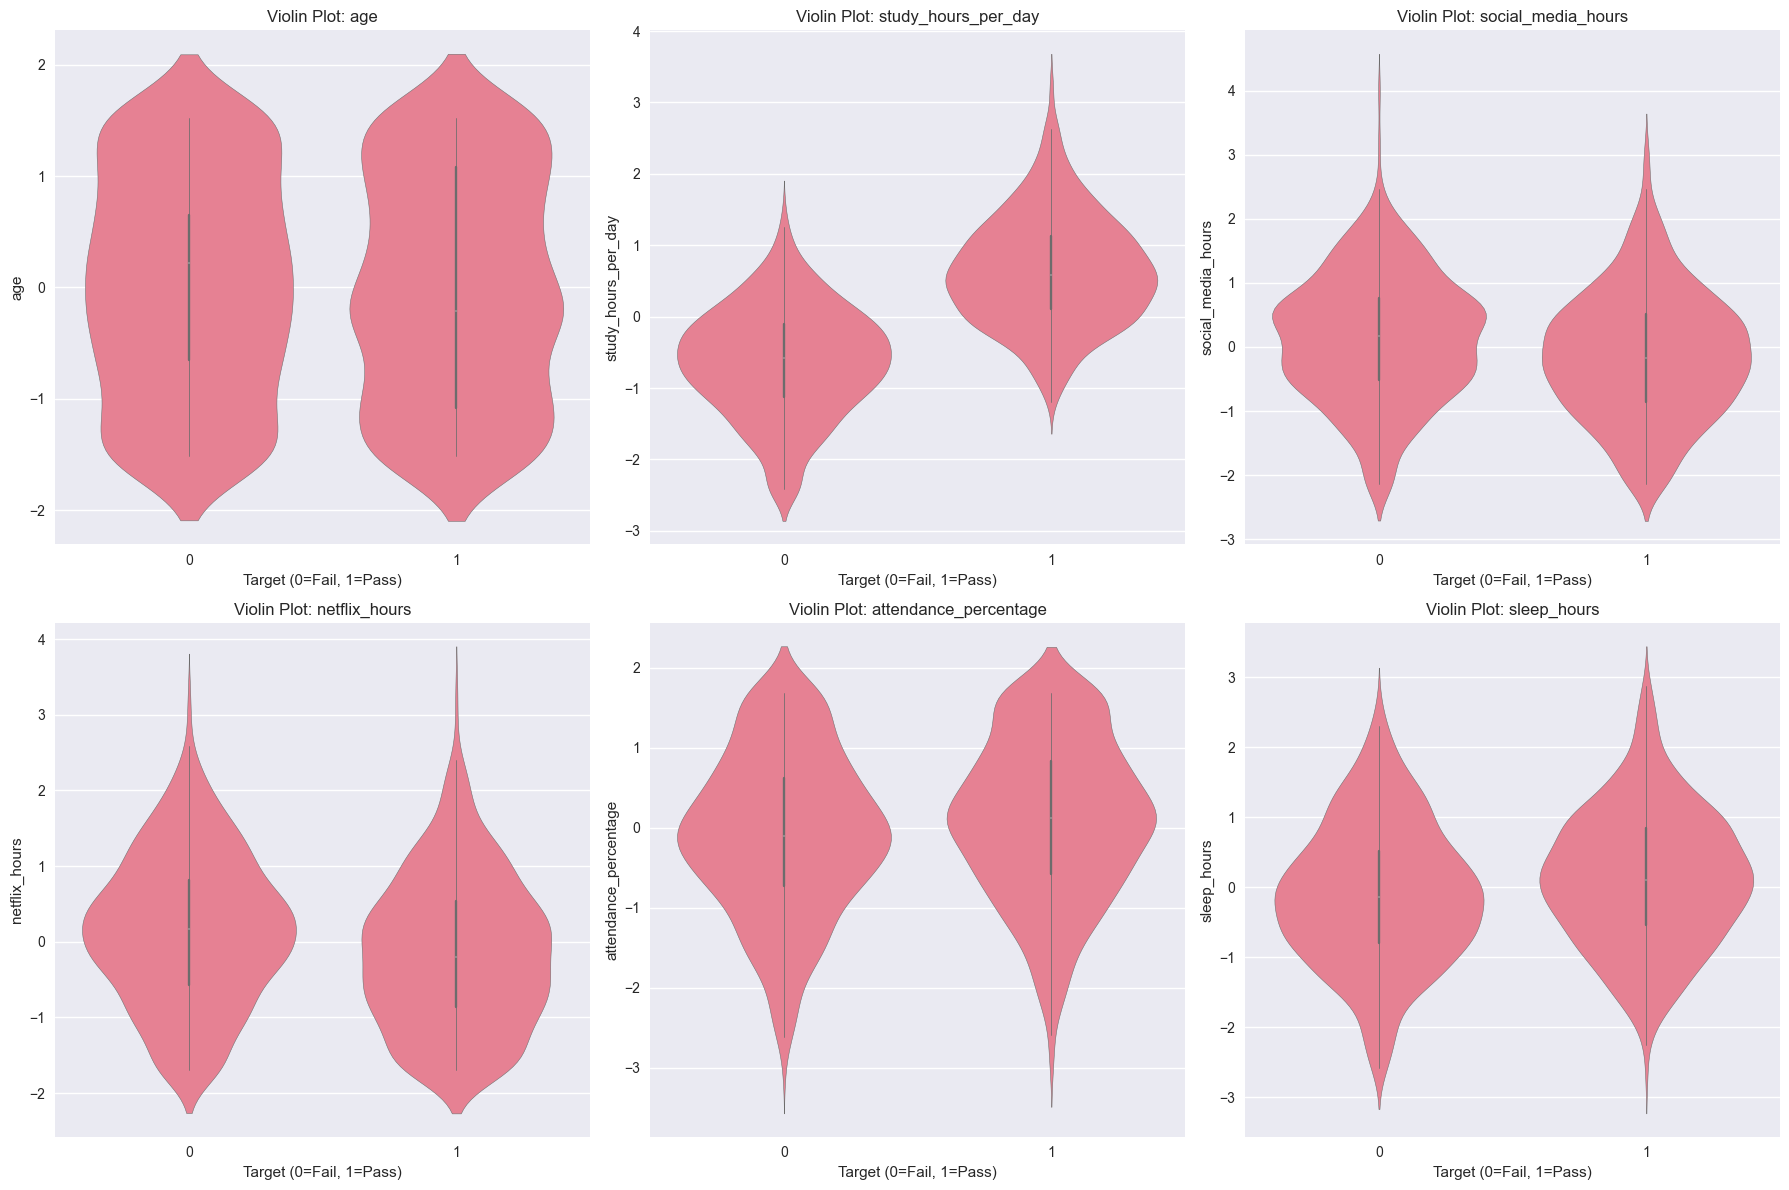

In [32]:
print("BOX AND VIOLIN PLOTS")


# Create subplots for top 6 numerical features
top_features = numerical_features[:6]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(top_features):
    # Box plot
    df.boxplot(column=col, by='target', ax=axes[i], grid=False)
    axes[i].set_title(f'Box Plot: {col}')
    axes[i].set_ylabel(col)

plt.suptitle('')
plt.tight_layout()
plt.show()

# Violin plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(top_features):
    sns.violinplot(x='target', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Violin Plot: {col}')
    axes[i].set_xlabel('Target (0=Fail, 1=Pass)')

plt.tight_layout()
plt.show()

HEATMAP


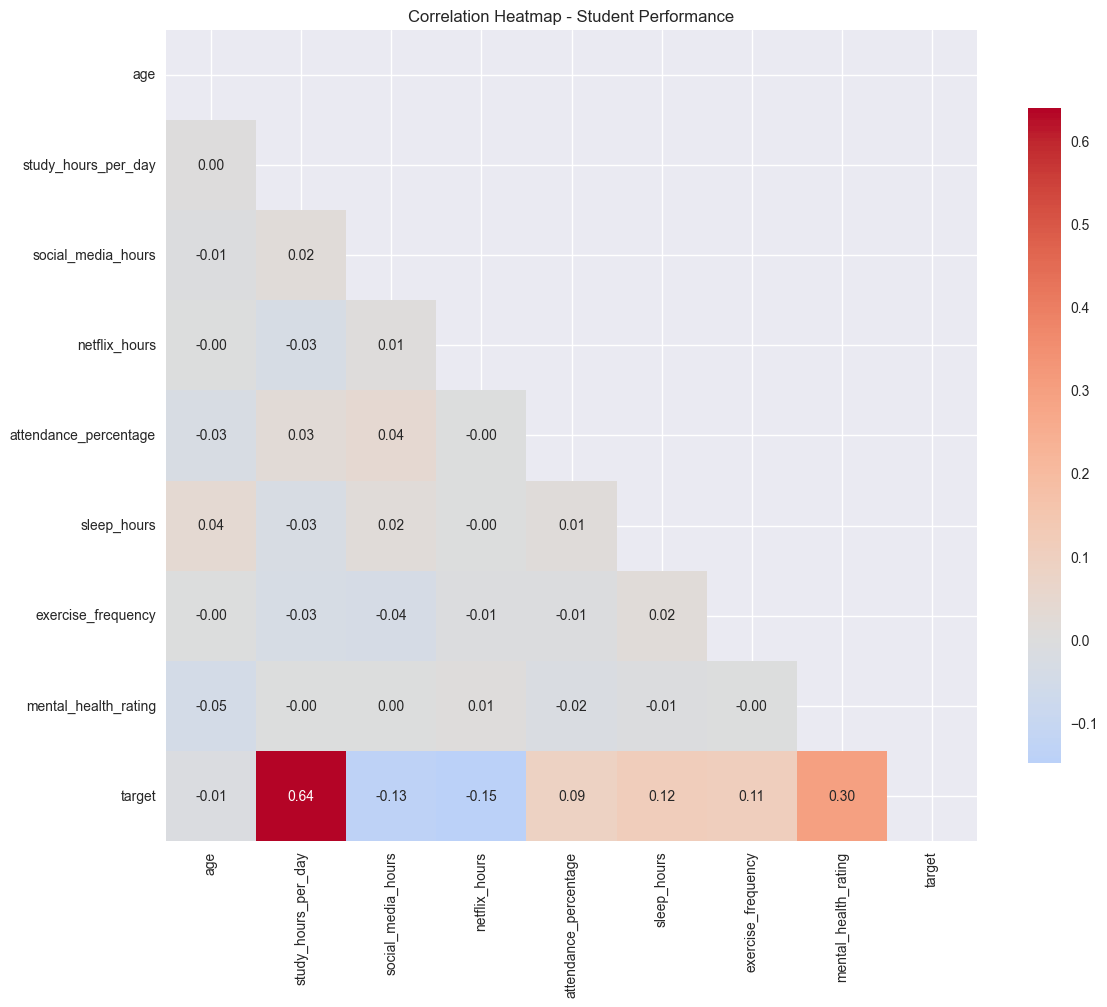

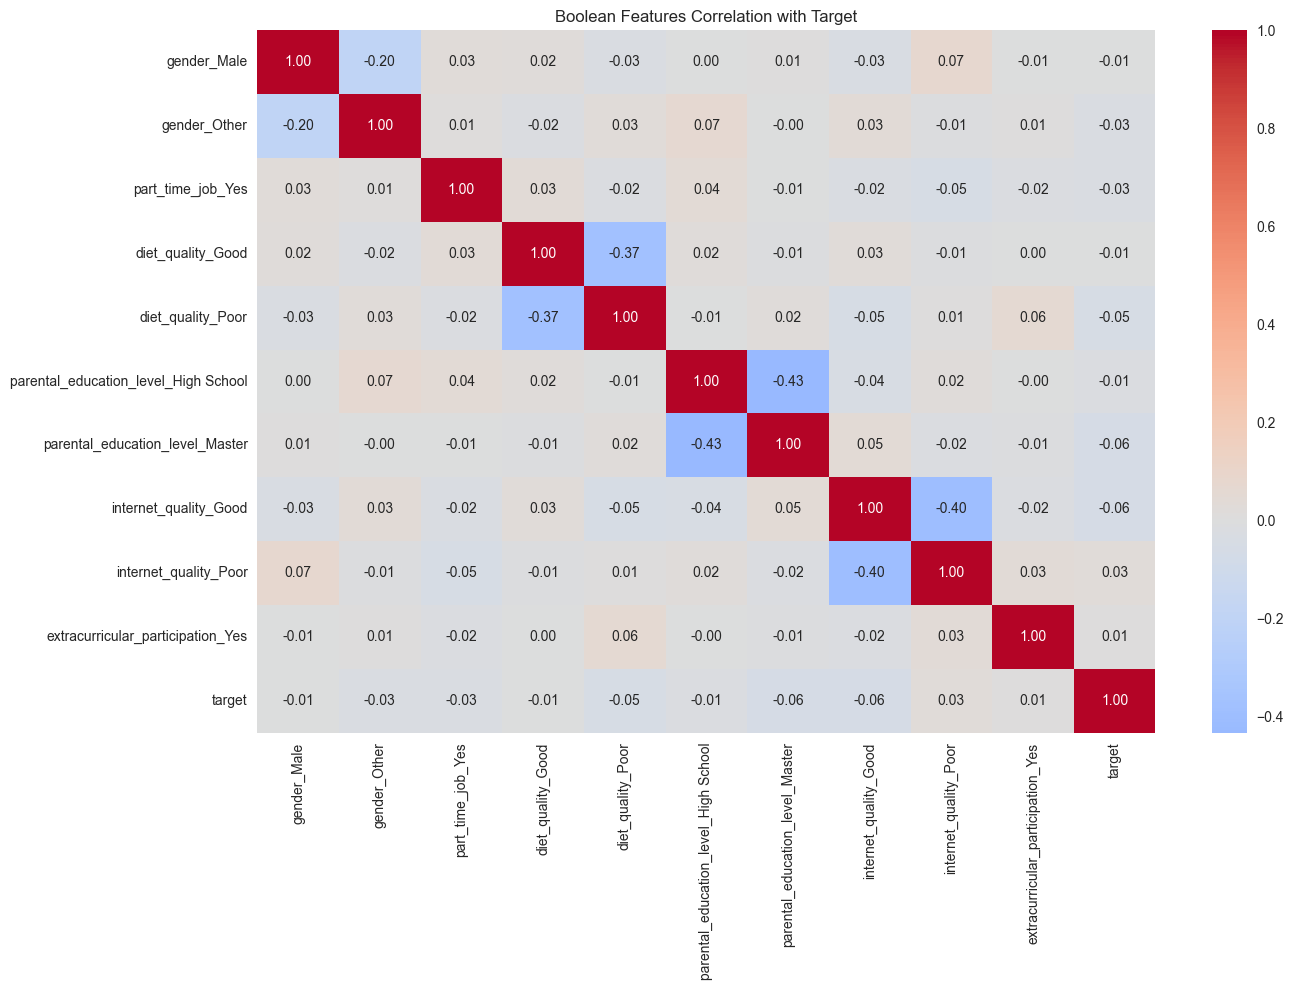

In [33]:
print("HEATMAP")


# Correlation heatmap for numerical features + target
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features + ['target']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            center=0, square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap - Student Performance')
plt.tight_layout()
plt.show()

# Boolean features heatmap
plt.figure(figsize=(14, 10))
boolean_corr = df[boolean_features + ['target']].corr()
sns.heatmap(boolean_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Boolean Features Correlation with Target')
plt.tight_layout()
plt.show()

PARALLEL COORDINATES


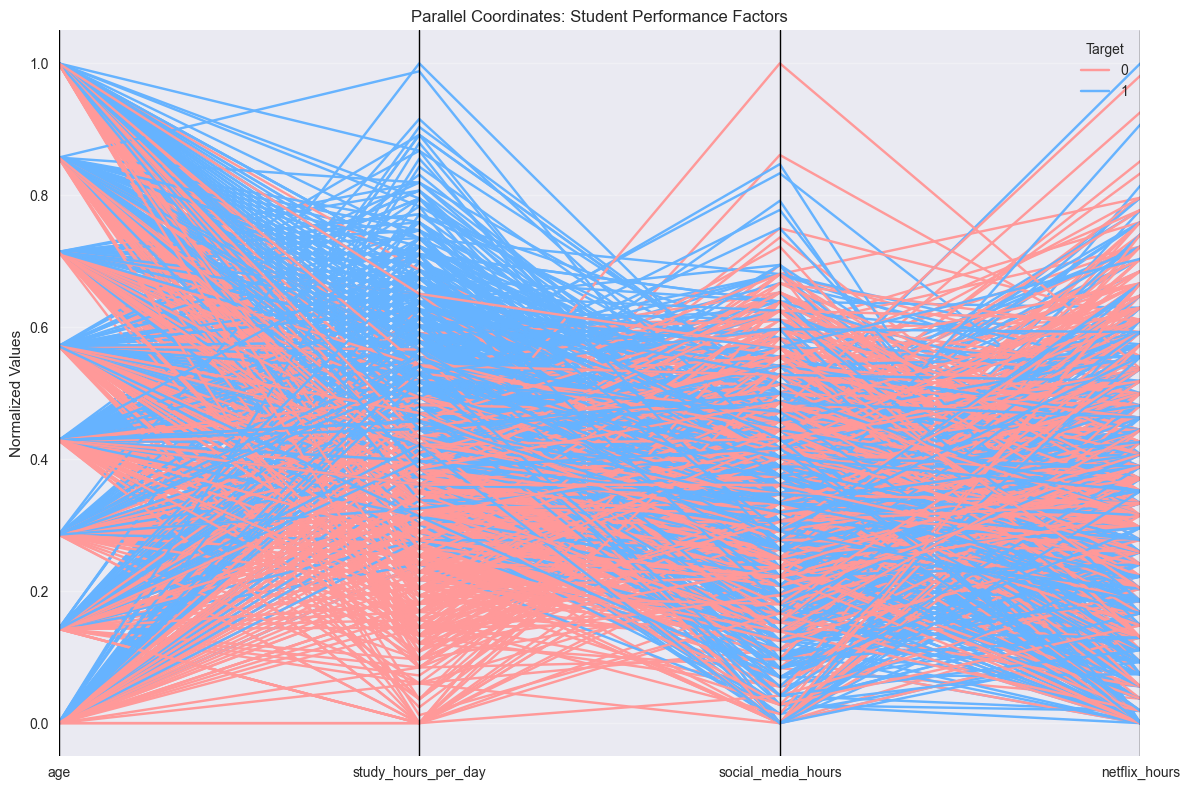

In [34]:
print("PARALLEL COORDINATES")


# Select top 4 numerical features for parallel coordinates
top_features = numerical_features[:4] + ['target']
parallel_df = df[top_features].copy()

# Normalize for parallel coordinates (already standardized, but ensure positive)
for col in numerical_features[:4]:
    parallel_df[col] = (parallel_df[col] - parallel_df[col].min()) / (parallel_df[col].max() - parallel_df[col].min())

plt.figure(figsize=(12, 8))
parallel_coordinates = pd.plotting.parallel_coordinates(parallel_df, 'target', 
                                                      color=('#ff9999', '#66b3ff'))
plt.title('Parallel Coordinates: Student Performance Factors')
plt.ylabel('Normalized Values')
plt.legend(title='Target', loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

RADAR CHARTS


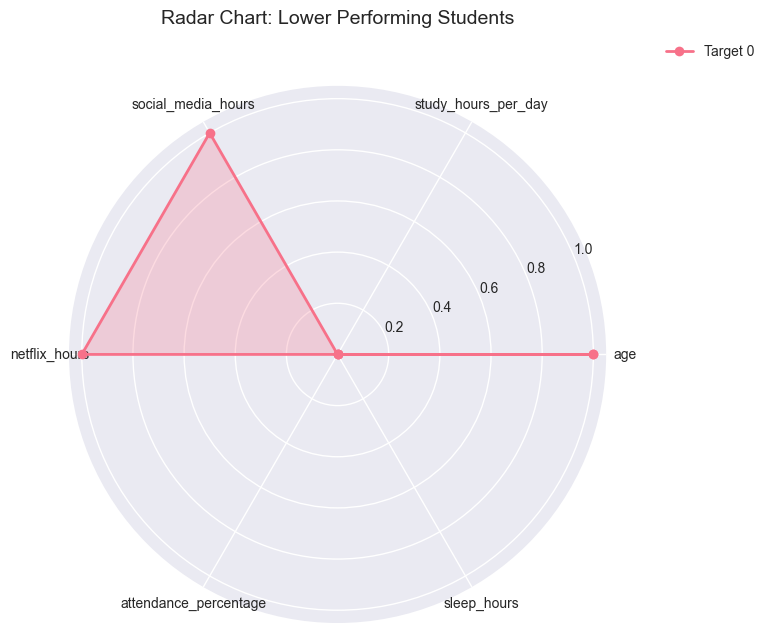

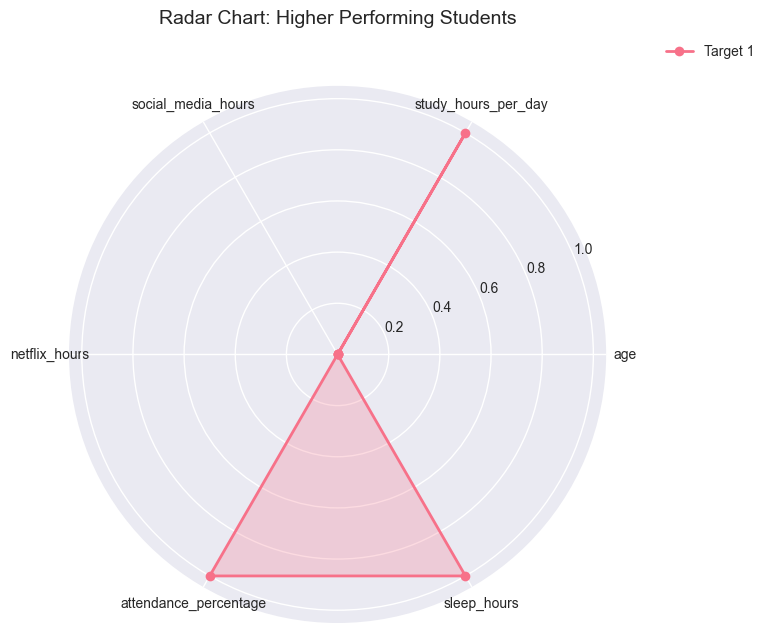

In [35]:
print("RADAR CHARTS")


def create_student_radar_chart(df, target_value, title):

    # Group by target and calculate mean of numerical features
    group_means = df.groupby('target')[numerical_features[:6]].mean()
    
    # Normalize values for radar chart (0-1 scale)
    normalized_means = (group_means - group_means.min()) / (group_means.max() - group_means.min())
    
    categories = normalized_means.columns.tolist()
    values = normalized_means.loc[target_value].values.tolist()
    values += values[:1]  # Complete the circle
    
    angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Target {target_value}')
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids([a * 180/np.pi for a in angles[:-1]], categories)
    ax.set_title(title, size=14, y=1.1)
    ax.grid(True)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()

# Create radar charts for both target classes
create_student_radar_chart(df, 0, 'Radar Chart: Lower Performing Students')
create_student_radar_chart(df, 1, 'Radar Chart: Higher Performing Students')

In [36]:


# Prepare features and target
X = df[features]
y = df[target]

print(f"Features shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42, stratify=y)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training target distribution:\n{y_train.value_counts()}")
print(f"Test target distribution:\n{y_test.value_counts()}")

Features shape: (1000, 18)
Target distribution:
target
0    502
1    498
Name: count, dtype: int64
Training set: (700, 18)
Test set: (300, 18)
Training target distribution:
target
0    351
1    349
Name: count, dtype: int64
Test target distribution:
target
0    151
1    149
Name: count, dtype: int64


TRAINING MACHINE LEARNING MODELS

Training Decision Tree...
Decision Tree trained successfully!
Accuracy: 0.7633

 Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       151
           1       0.72      0.85      0.78       149

    accuracy                           0.76       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.77      0.76      0.76       300



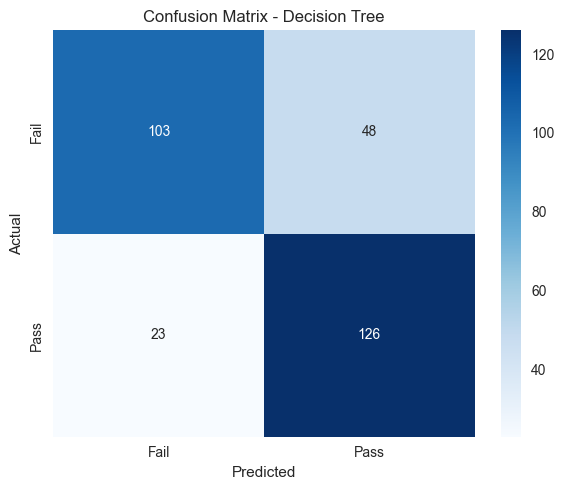


Training Logistic Regression...
Logistic Regression trained successfully!
Accuracy: 0.8767

 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       151
           1       0.88      0.87      0.87       149

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



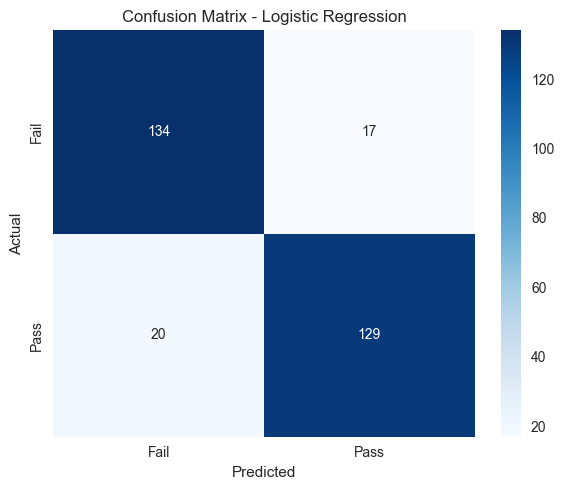

In [37]:
print("TRAINING MACHINE LEARNING MODELS")


# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\n{'='*30}")
    print(f"Training {name}...")
    print('='*30)
    
    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'accuracy': accuracy
    }
    
    print(f"{name} trained successfully!")
    print(f"Accuracy: {accuracy:.4f}")
    
    # Classification Report
    print(f"\n Classification Report for {name}:")
    print("="*40)
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Fail', 'Pass'], 
                yticklabels=['Fail', 'Pass'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

 MODEL COMPARISON AND FEATURE ANALYSIS
Model Performance Comparison:


,Model,Accuracy
0,Decision Tree,0.763333
1,Logistic Regression,0.876667


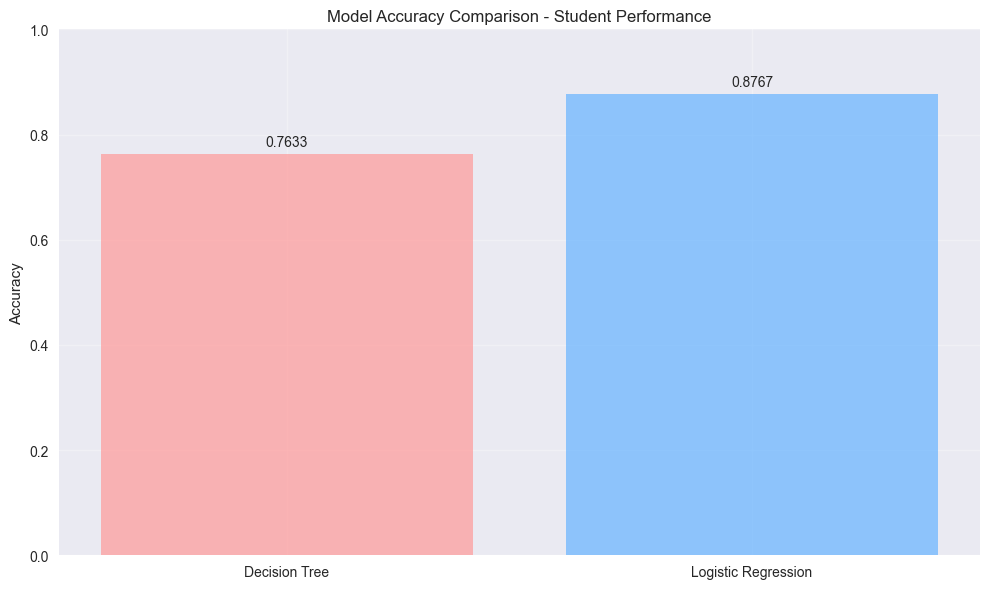

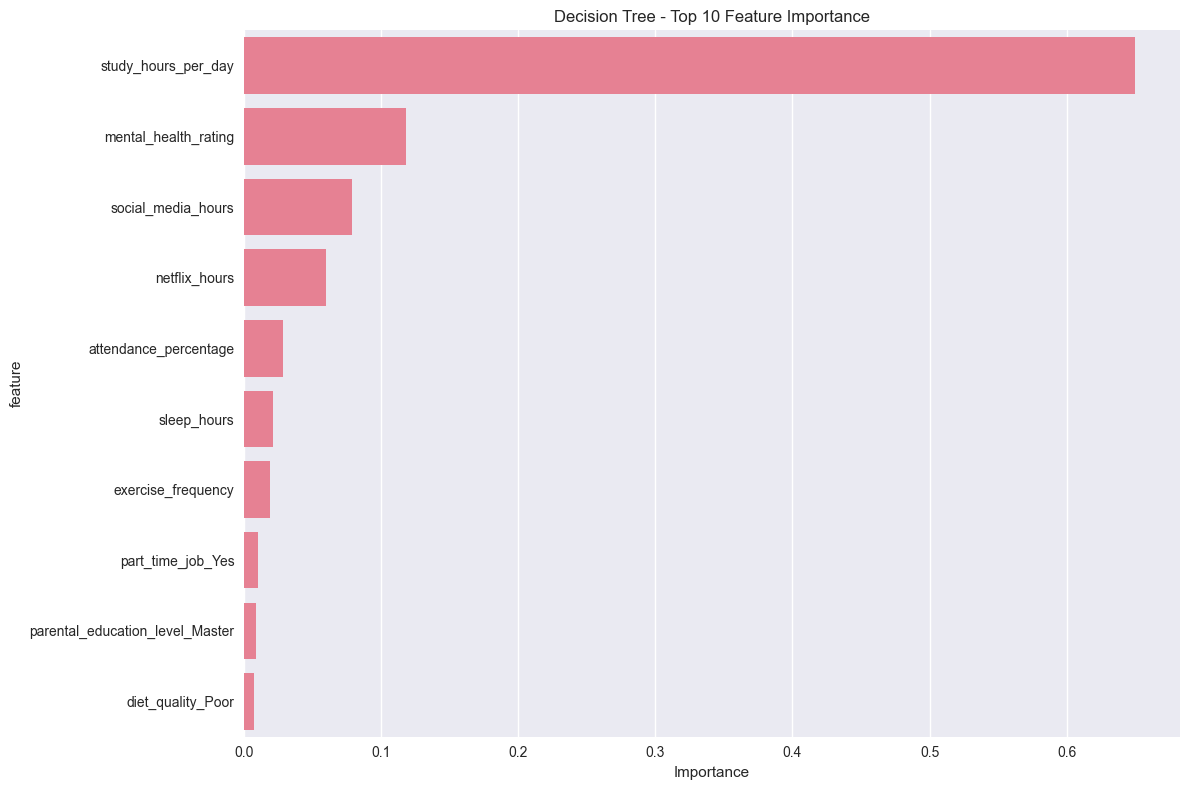

 Decision Tree Feature Importance (Top 10):


,feature,importance
1,study_hours_per_day,0.650223
7,mental_health_rating,0.118199
2,social_media_hours,0.078746
3,netflix_hours,0.059322
4,attendance_percentage,0.028089
5,sleep_hours,0.020673
6,exercise_frequency,0.018659
10,part_time_job_Yes,0.010087
14,parental_education_level_Master,0.008606
12,diet_quality_Poor,0.007396


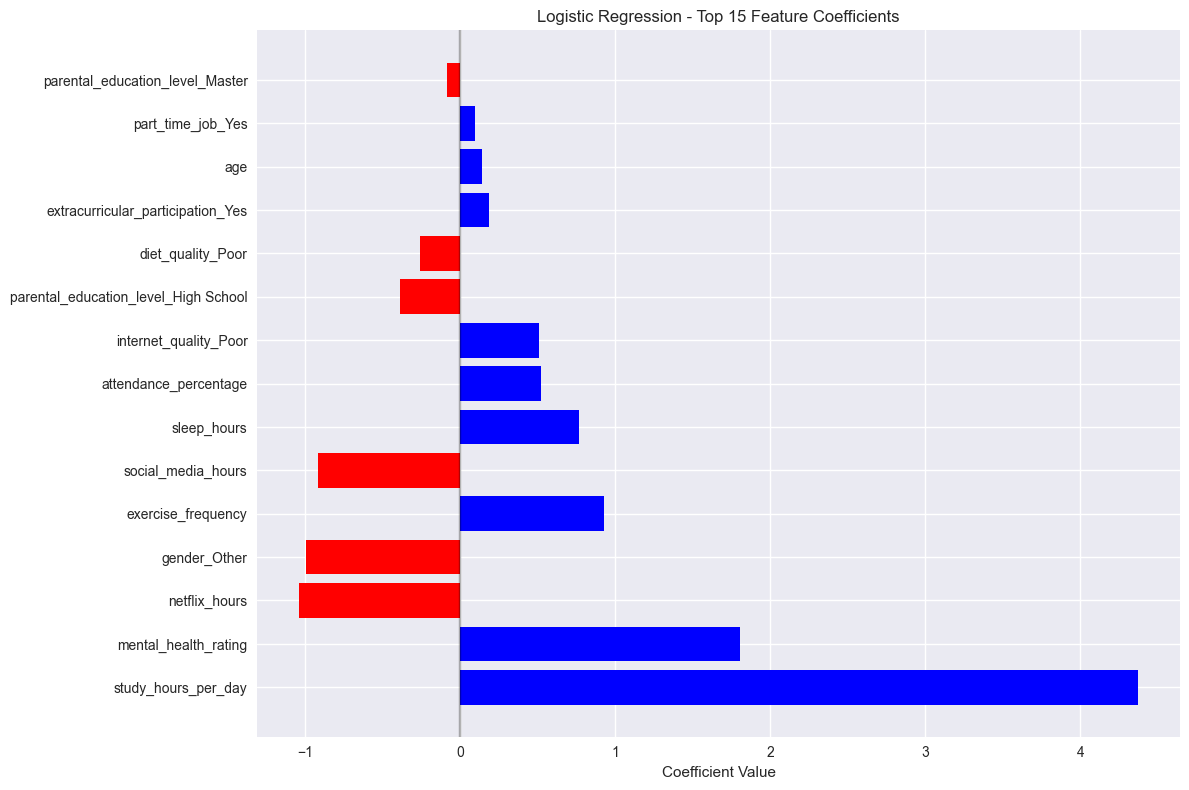

 Logistic Regression Coefficients (Top 15):


,feature,coefficient
1,study_hours_per_day,4.371738
7,mental_health_rating,1.803885
3,netflix_hours,-1.036878
9,gender_Other,-0.994303
6,exercise_frequency,0.927336
2,social_media_hours,-0.914136
5,sleep_hours,0.764347
4,attendance_percentage,0.519469
16,internet_quality_Poor,0.506502
13,parental_education_level_High School,-0.387325


In [38]:
print(" MODEL COMPARISON AND FEATURE ANALYSIS")


# Compare model performance
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results.keys()]
})

print("Model Performance Comparison:")
display(comparison_df)

# Visualize accuracy comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'], 
               color=['#ff9999', '#66b3ff'], alpha=0.7)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison - Student Performance')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Feature Importance for Decision Tree
if 'Decision Tree' in results:
    dt_model = results['Decision Tree']['model']
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': dt_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title('Decision Tree - Top 10 Feature Importance')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    
    print(" Decision Tree Feature Importance (Top 10):")
    display(feature_importance.head(10))

# Coefficients for Logistic Regression
if 'Logistic Regression' in results:
    lr_model = results['Logistic Regression']['model']
    coefficients = pd.DataFrame({
        'feature': features,
        'coefficient': lr_model.coef_[0]
    }).sort_values('coefficient', key=abs, ascending=False)
    
    plt.figure(figsize=(12, 8))
    colors = ['red' if x < 0 else 'blue' for x in coefficients['coefficient'].head(15)]
    plt.barh(coefficients['feature'].head(15), coefficients['coefficient'].head(15), color=colors)
    plt.title('Logistic Regression - Top 15 Feature Coefficients')
    plt.xlabel('Coefficient Value')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(" Logistic Regression Coefficients (Top 15):")
    display(coefficients.head(15))

In [40]:


from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# Enhanced evaluation function
def comprehensive_evaluation(model, X_test, y_test, model_name):
    """Perform comprehensive model evaluation"""
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    
    return {
        'accuracy': accuracy,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'fpr': fpr,
        'tpr': tpr,
        'precision': precision,
        'recall': recall,
        'y_pred_proba': y_pred_proba
    }

# Evaluate all models
detailed_results = {}
for name, result in results.items():
    print(f"\nEvaluating {name}...")
    detailed_results[name] = comprehensive_evaluation(
        result['model'], X_test, y_test, name
    )
    
    print(f"{name} Performance:")
    print(f"   Accuracy:  {detailed_results[name]['accuracy']:.4f}")
    print(f"   F1-Score:  {detailed_results[name]['f1_score']:.4f}")
    print(f"   ROC AUC:   {detailed_results[name]['roc_auc']:.4f}")
    print(f"   PR AUC:    {detailed_results[name]['pr_auc']:.4f}")

# Create comprehensive comparison
comparison_metrics = pd.DataFrame({
    'Model': list(detailed_results.keys()),
    'Accuracy': [detailed_results[name]['accuracy'] for name in detailed_results.keys()],
    'F1-Score': [detailed_results[name]['f1_score'] for name in detailed_results.keys()],
    'ROC AUC': [detailed_results[name]['roc_auc'] for name in detailed_results.keys()],
    'PR AUC': [detailed_results[name]['pr_auc'] for name in detailed_results.keys()]
})

print("\n📈 Comprehensive Model Comparison:")
display(comparison_metrics)


Evaluating Decision Tree...
Decision Tree Performance:
   Accuracy:  0.7633
   F1-Score:  0.7802
   ROC AUC:   0.8199
   PR AUC:    0.7972

Evaluating Logistic Regression...
Logistic Regression Performance:
   Accuracy:  0.8767
   F1-Score:  0.8746
   ROC AUC:   0.9524
   PR AUC:    0.9525

📈 Comprehensive Model Comparison:


,Model,Accuracy,F1-Score,ROC AUC,PR AUC
0,Decision Tree,0.763333,0.780186,0.819881,0.797204
1,Logistic Regression,0.876667,0.874576,0.952442,0.952472


 ENHANCED CONFUSION MATRICES


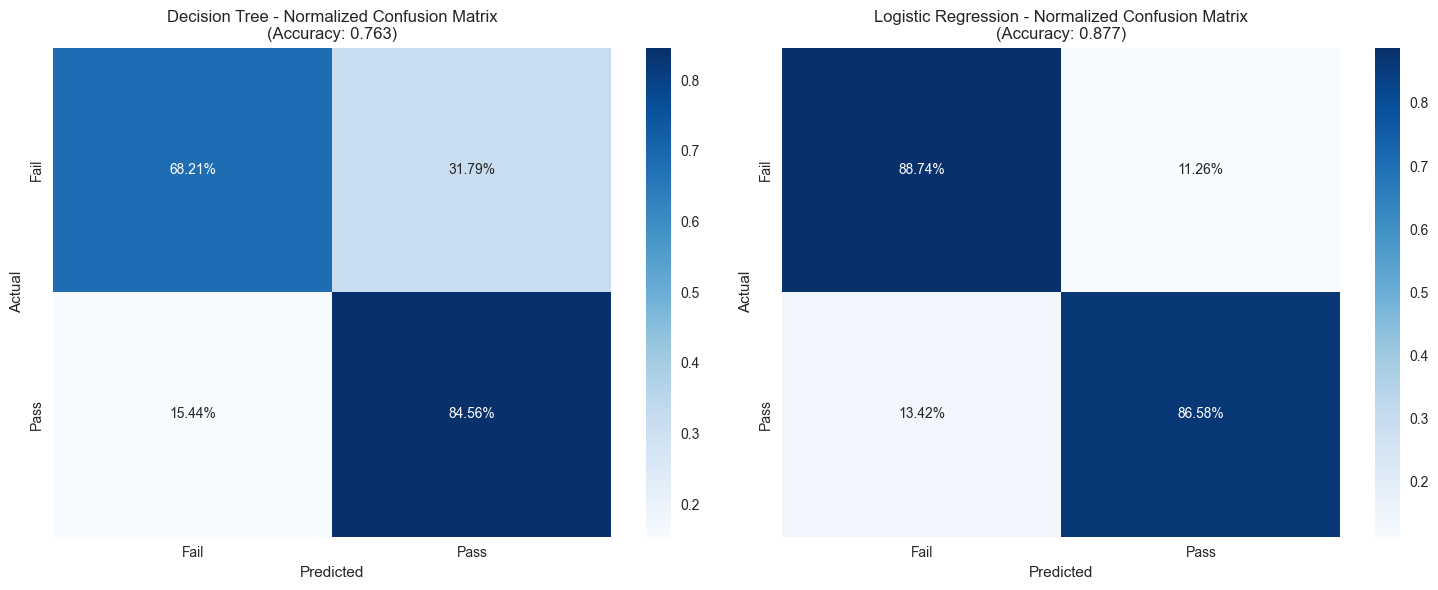


 Decision Tree - Detailed Confusion Matrix Analysis:
   True Negatives (Correct Fail):  103
   False Positives (False Pass):    48
   False Negatives (False Fail):    23
   True Positives (Correct Pass):  126
   Sensitivity/Recall: 0.846
   Specificity:        0.682
   Precision:          0.724

 Logistic Regression - Detailed Confusion Matrix Analysis:
   True Negatives (Correct Fail):  134
   False Positives (False Pass):    17
   False Negatives (False Fail):    20
   True Positives (Correct Pass):  129
   Sensitivity/Recall: 0.866
   Specificity:        0.887
   Precision:          0.884


In [41]:
print(" ENHANCED CONFUSION MATRICES")
print("="*50)

# Create normalized confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for idx, (name, result) in enumerate(results.items()):
    # Regular confusion matrix
    cm = confusion_matrix(y_test, result['y_pred'])
    
    # Normalized confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Plot both
    plt.subplot(1, 2, idx + 1)
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', 
                xticklabels=['Fail', 'Pass'], 
                yticklabels=['Fail', 'Pass'])
    plt.title(f'{name} - Normalized Confusion Matrix\n(Accuracy: {detailed_results[name]["accuracy"]:.3f})')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plt.tight_layout()
plt.show()

# Detailed confusion matrix analysis
for name, result in results.items():
    cm = confusion_matrix(y_test, result['y_pred'])
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\n {name} - Detailed Confusion Matrix Analysis:")
    print(f"   True Negatives (Correct Fail):  {tn:3d}")
    print(f"   False Positives (False Pass):   {fp:3d}")
    print(f"   False Negatives (False Fail):   {fn:3d}")
    print(f"   True Positives (Correct Pass):  {tp:3d}")
    print(f"   Sensitivity/Recall: {tp/(tp+fn):.3f}")
    print(f"   Specificity:        {tn/(tn+fp):.3f}")
    print(f"   Precision:          {tp/(tp+fp):.3f}")

ROC CURVES AND AUC


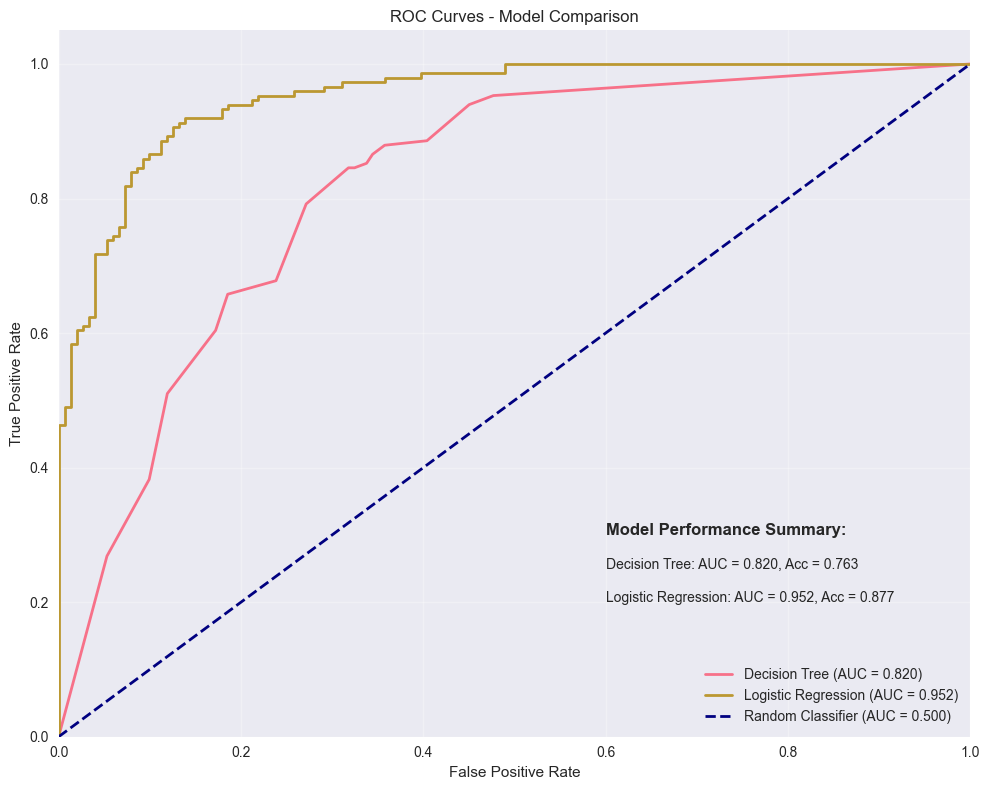

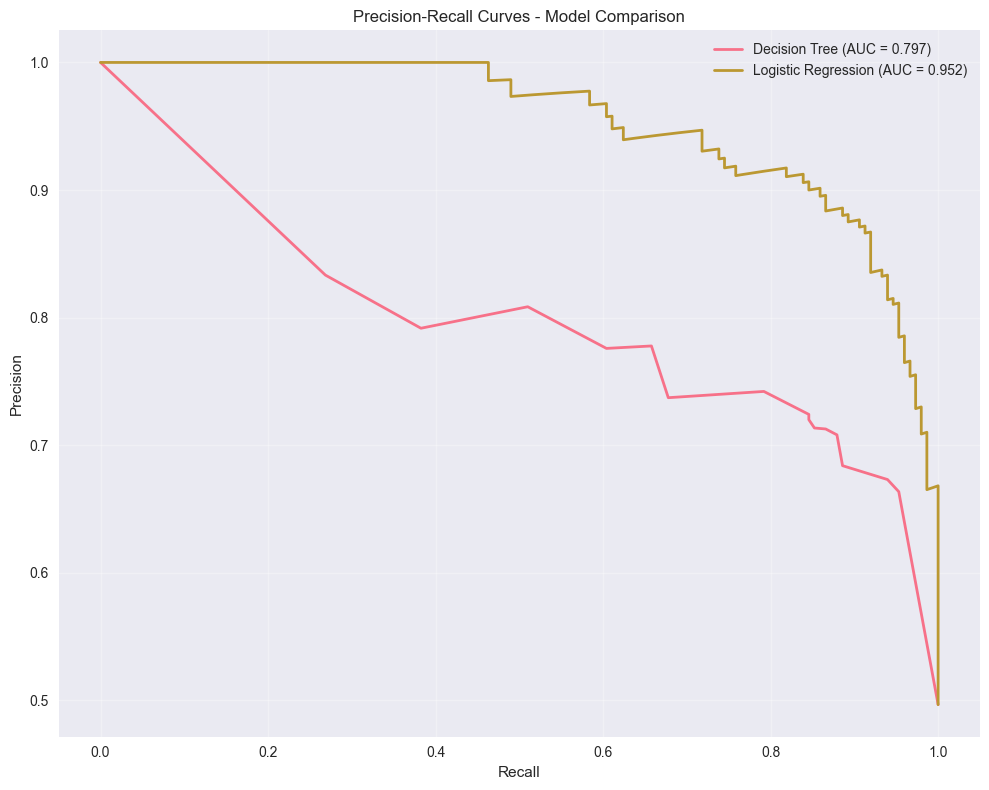

In [42]:
print("ROC CURVES AND AUC")


# Create ROC curve comparison
plt.figure(figsize=(10, 8))

# Plot ROC curves for all models
for name, details in detailed_results.items():
    plt.plot(details['fpr'], details['tpr'], 
             lw=2, label=f'{name} (AUC = {details["roc_auc"]:.3f})')

# Plot random classifier
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Random Classifier (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Add performance details
plt.text(0.6, 0.3, 'Model Performance Summary:', fontsize=12, fontweight='bold')
y_pos = 0.25
for name, details in detailed_results.items():
    plt.text(0.6, y_pos, f'{name}: AUC = {details["roc_auc"]:.3f}, Acc = {details["accuracy"]:.3f}', 
             fontsize=10)
    y_pos -= 0.05

plt.tight_layout()
plt.show()

# Precision-Recall Curves
plt.figure(figsize=(10, 8))

for name, details in detailed_results.items():
    plt.plot(details['recall'], details['precision'], 
             lw=2, label=f'{name} (AUC = {details["pr_auc"]:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves - Model Comparison')
plt.legend(loc="upper right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

SHAP ANALYSIS - GLOBAL FEATURE IMPORTANCE


Calculating SHAP values for Decision Tree...


<Figure size 1000x800 with 0 Axes>

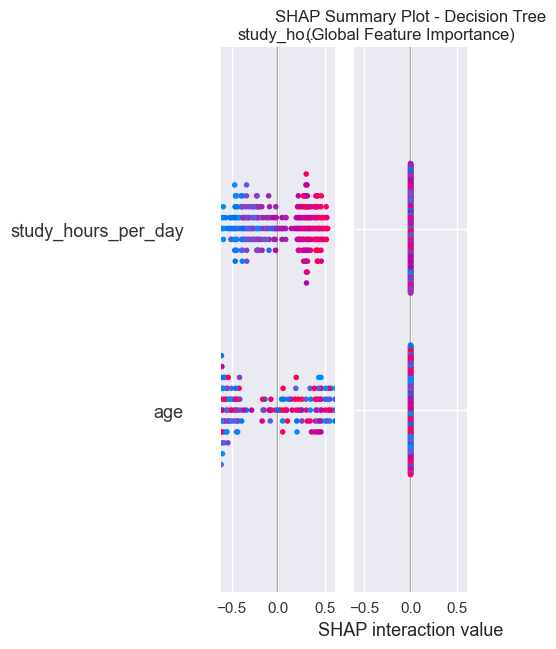

 SHAP Force Plots (First 3 instances):


DimensionError: Length of features is not equal to the length of shap_values!

<Figure size 1000x300 with 0 Axes>

In [43]:
print("SHAP ANALYSIS - GLOBAL FEATURE IMPORTANCE")


try:
    import shap
    
    # Initialize SHAP
    shap.initjs()
    
    # SHAP for Decision Tree
    if 'Decision Tree' in results:
        print("Calculating SHAP values for Decision Tree...")
        dt_model = results['Decision Tree']['model']
        
        # Create SHAP explainer
        explainer_dt = shap.TreeExplainer(dt_model)
        shap_values_dt = explainer_dt.shap_values(X_test)
        
        # Summary plot
        plt.figure(figsize=(10, 8))
        shap.summary_plot(shap_values_dt, X_test, feature_names=features, show=False)
        plt.title('SHAP Summary Plot - Decision Tree\n(Global Feature Importance)')
        plt.tight_layout()
        plt.show()
        
        # Force plot for first few instances
        print(" SHAP Force Plots (First 3 instances):")
        for i in range(min(3, len(X_test))):
            plt.figure(figsize=(10, 3))
            shap.force_plot(explainer_dt.expected_value[1], shap_values_dt[1][i,:], 
                           X_test.iloc[i,:], feature_names=features, matplotlib=True, show=False)
            plt.title(f'SHAP Force Plot - Instance {i+1}\n(Actual: {y_test.iloc[i]}, Predicted: {results["Decision Tree"]["y_pred"][i]})')
            plt.tight_layout()
            plt.show()
    
    # SHAP for Logistic Regression (using KernelExplainer)
    if 'Logistic Regression' in results:
        print(" Calculating SHAP values for Logistic Regression...")
        lr_model = results['Logistic Regression']['model']
        
        # Use KernelExplainer for linear models
        def lr_predict_proba(X):
            return lr_model.predict_proba(X)
        
        explainer_lr = shap.KernelExplainer(lr_predict_proba, X_train[:100])  # Use subset for speed
        shap_values_lr = explainer_lr.shap_values(X_test[:50])  # Use subset for speed
        
        # Summary plot for class 1 (pass)
        if len(shap_values_lr) > 1:  
            plt.figure(figsize=(10, 8))
            shap.summary_plot(shap_values_lr[1], X_test[:50], feature_names=features, show=False)
            plt.title('SHAP Summary Plot - Logistic Regression\n(Global Feature Importance)')
            plt.tight_layout()
            plt.show()

except ImportError:
    print("SHAP not installed. Installing...")
    !pip install shap
    import shap
    print("SHAP installed successfully! Please re-run the SHAP section.")